# make

In [3]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd

# Note: The data used in this code contains Chinese text fields, so some variable names or data contents will appear in Chinese.
# To facilitate understanding, I have used English comments (#) at the corresponding locations to mark their corresponding English meanings.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Chinese font
font_path = "Chinese/SourceHanSansSC-Regular.otf"  
chinese_font = fm.FontProperties(fname=font_path)

In [13]:
plt.rcParams["font.family"] = chinese_font.get_name()

In [ ]:
# Download Walking Network Diagram
# read shapefile 
boundary_gdf = gpd.read_file("shanghai_population.shp", encoding="GB2312")

# Filter out Sipinglu Street
siping_polygon = boundary_gdf[boundary_gdf["街道镇"] == "四平路街道"].geometry.union_all() # [“Streets and Towns”] == “Sipinglu Street”]

# Download Pedestrian Network of Sipinglu  Streets
G = ox.graph_from_polygon(siping_polygon, network_type="walk")

In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# Walking speed (in meters/minute)
walking_speeds = {
    "children": 60,    # 3.6 km/h
    "adults": 83,      # 5 km/h
    "elderly": 50      # 3.0 km/h
}

# Range of isochrones (minutes)
iso_times = [3, 5, 7, 10, 12, 15]
colors    = ["#add8e6", "#bbdeea", "#c9e5ee", "#d7ebf2", "#e4f2f7", "#f2f8fb"]

/tmp/ipykernel_2132/1710816105.py:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_all = bdy[bdy["街道镇"]=="四平路街道"].geometry.unary_union
/tmp/ipykernel_2132/1710816105.py:75: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  hull = gpd.GeoSeries(pts).unary_union.convex_hull
/opt/conda/lib/python3.11/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/opt/conda/lib/python3.11/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/opt/conda/lib/python3.11/site-packages/geopandas/plotting.py:482: UserWarning: Glyph 23621 (\N{CJK UNIFIED IDEOGRAPH-5C45}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/opt/conda/lib/python3.11/site-packages/g

SSLError: HTTPSConnectionPool(host='a.basemaps.cartocdn.com', port=443): Max retries exceeded with url: /light_nolabels/15/27442/13385.png (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1006)')))

/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 23621 (\N{CJK UNIFIED IDEOGRAPH-5C45}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22996 (\N{CJK UNIFIED IDEOGRAPH-59D4}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 20250 (\N{CJK UNIFIED IDEOGRAPH-4F1A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: 

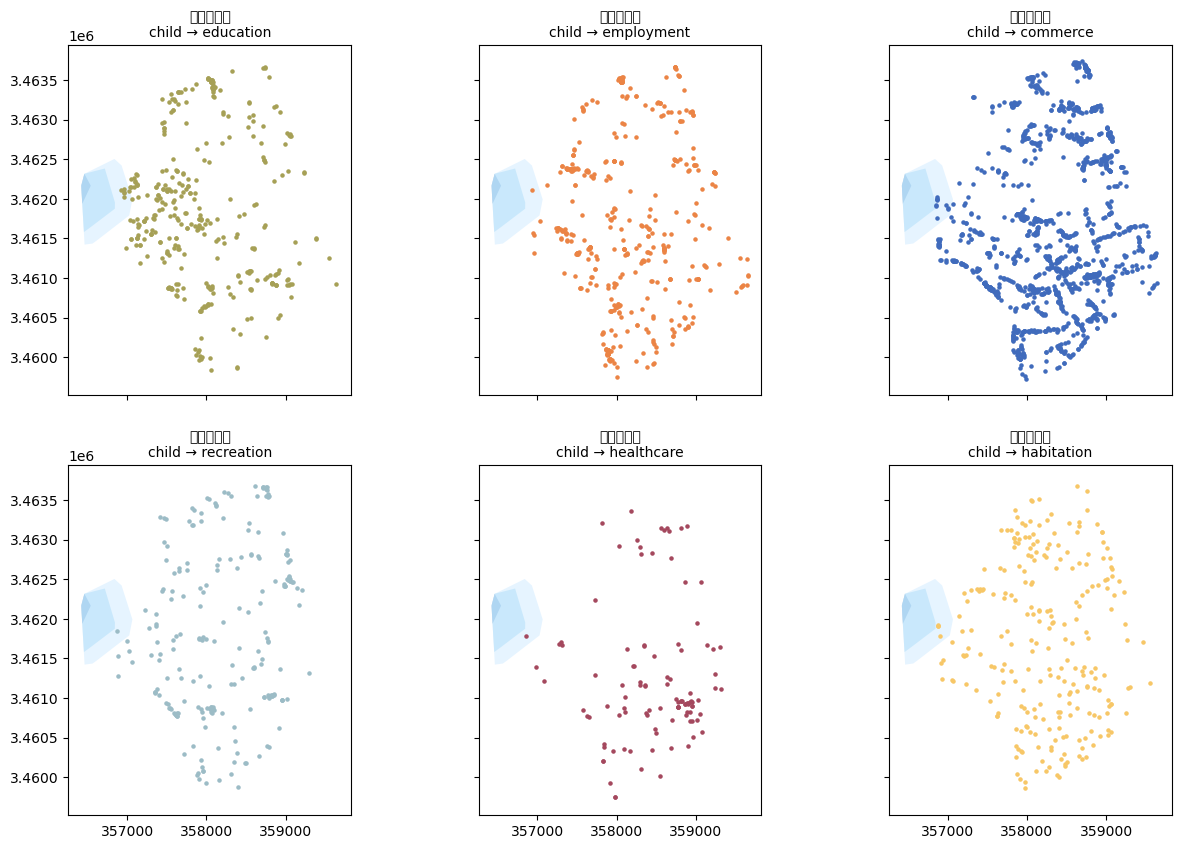

In [ ]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Setting Walking speed (m/min) and isochronous parameters for three groups of people
walking_speeds = {"child": 60, "adult": 83, "elderly": 50}
iso_times     = [5, 10, 15]
iso_colors    = ["#4d82bc", "#88CDF6", "#C1E5FF"]

# Read street boundary, build pedestrian network
bdy      = gpd.read_file("shanghai_population.shp", encoding="gb2312")
poly_all = bdy[bdy["街道镇"]=="四平路街道"].geometry.unary_union        # [“Streets and Towns”] == “Sipinglu Street”]
G        = ox.graph_from_polygon(poly_all, network_type="walk")      # lon/lat graph
G_proj   = ox.project_graph(G, to_crs="EPSG:32651")                  # UTM 

# Longitude and latitude mapping of the five communities
committee_coords = {
    "金安居委会":       (121.491967, 31.284764),  # Jian Community
    "同济新村居委会":   (121.509834, 31.283388),   # Tongjixincun Community
    "鞍山四村第三居委会": (121.507797, 31.275515),  # Anshansicun No.3 Community
    "密云路居委会":     (121.496867, 31.278469),   # Miyunlu Community
    "铁岭路九十弄居委会": (121.511304, 31.279358),  # Tielinglu No.9 Community
}

# Six-function POI file dictionary (gcj_lng/gcj_lat)
func_files = {
  "education":  "poi_by_function/siping_教育.csv",  # Education
  "employment": "poi_by_function/siping_就业.csv",  # Employment
  "commerce":   "poi_by_function/siping_商业.csv",  # Commerce
  "recreation": "poi_by_function/siping_休闲娱乐.csv", # Recreation
  "healthcare": "poi_by_function/siping_医疗.csv", # Healthcare
  "habitation": "poi_by_function/siping_居住.csv" # Habitation
}
# The color of the point corresponding to each function
func_colors = {
  "education":  "#A6A056",   # Education
  "employment": "#EB8445",   # Employment
  "commerce":   "#406BBC",   # Commerce
  "recreation": "#9CBCC6",   # Recreation
  "healthcare": "#A4485E",   # Healthcare
  "habitation": "#F7C767"    # Habitation
}

# Read and project all functional POI
poi_gdfs = {}
for func, fn in func_files.items():
    df = gpd.read_file(fn)
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df["gcj_lng"], df["gcj_lat"]),
        crs="EPSG:4490"
    ).to_crs(epsg=32651)
    poi_gdfs[func] = gdf

# Main loop: per neighborhood council × per population group
for committee, (lon, lat) in committee_coords.items():
    # Find the nearest node on the original (lon/lat) graph G
    orig_node = ox.distance.nearest_nodes(G, lon, lat)
    
    for group, speed in walking_speeds.items():
        fig, axes = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey=True)
        axes = axes.flatten()
        
        # Drawing isochrones & POI
        for ax, (func, poi_gdf) in zip(axes, poi_gdfs.items()):
            ax.set_title(f"{committee}\n{group} → {func}", fontsize=10)
            for t, col in zip(iso_times, iso_colors):
                cutoff = t * speed
                subg   = nx.ego_graph(G_proj, orig_node, radius=cutoff, distance="length")
                pts    = [Point(d["x"], d["y"]) for _, d in subg.nodes(data=True)]
                if len(pts) > 2:
                    hull = gpd.GeoSeries(pts).unary_union.convex_hull
                    gpd.GeoSeries([hull]).plot(
                        ax=ax, facecolor=col, edgecolor="none", alpha=0.4
                    )
            poi_gdf.plot(ax=ax, 
                         color=func_colors[func], 
                         markersize=5
                        )
        
        # Add a grayscale basemap to each subgraph
        for ax in axes:
            ctx.add_basemap(
                ax,
                source=ctx.providers.CartoDB.PositronNoLabels,
                crs=G_proj.graph["crs"]
            )
            ax.axis("off")
        
        plt.tight_layout()
        plt.savefig(f"iso_{committee}_{group}.png", dpi=300)
        plt.close()

In [ ]:
import pandas as pd
import osmnx as ox
import networkx as nx
from shapely.geometry import Point

# Get your walking network and projection ready first
bdy      = gpd.read_file("shanghai_population.shp", encoding="gb2312")
poly_all = bdy[bdy["街道镇"]=="四平路街道"].geometry.unary_union # [bdy[“Street Town”]==“Sipinglu Street”]
G        = ox.graph_from_polygon(poly_all, network_type="walk")
G_proj   = ox.project_graph(G, to_crs="EPSG:32651")

# community Latitude and Longitude
committee_coords = {
    "金安居委会":       (121.491967, 31.284764), # Jian Community
    "同济新村居委会":   (121.509834, 31.283388), # Tongjixincun Community
    "鞍山四村第三居委会": (121.507797, 31.275515), # Anshansicun No.3 Community
    "密云路居委会":     (121.496867, 31.278469), # Miyunlu Community 
    "铁岭路九十弄居委会": (121.511304, 31.279358), # Tielinglu No.9 Community
}

# Crowd speed & Isochrones
walking_speeds = {"child":60, "adult":83, "elderly":50}  
iso_times      = [5, 10, 15]                           

# Read and project POI
poi_gdfs = {}
for func, fn in func_files.items():
    df  = pd.read_csv(fn)   
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df["gcj_lng"], df["gcj_lat"]),
        crs="EPSG:4490"
    ).to_crs(epsg=32651)
    poi_gdfs[func] = gdf

# Computing Accessibility Statistics
rows = []
for committee, (lon, lat) in committee_coords.items():
    # Origin nodes: first positioned in the unprojected map, then mapped to the projected map
    orig0 = ox.distance.nearest_nodes(G, lon, lat)
    # Maps orig0 to the nearest node of the projection map.
    x0, y0 = G.nodes[orig0]['x'], G.nodes[orig0]['y']
    orig = ox.distance.nearest_nodes(G_proj, x0, y0)

    # Calculate the shortest distance from all nodes to orig at once
    dist_map = nx.single_source_dijkstra_path_length(G_proj, orig, weight="length")

    for group, speed in walking_speeds.items():
        for t in iso_times:
            cutoff = t * speed
            for func, gdf in poi_gdfs.items():
                cnt = 0
                # Iterate through all POIs for the feature and see how many fall within the cutoff
                for pt in gdf.geometry:
                    node = ox.distance.nearest_nodes(G_proj, pt.x, pt.y)
                    if dist_map.get(node, float('inf')) <= cutoff:
                        cnt += 1
                rows.append({
                    "committee": committee,
                    "group": group,
                    "time_min": t,
                    "function": func,
                    "count": cnt
                })

# Building DataFrames
df = pd.DataFrame(rows)
df_pivot = df.pivot_table(
    index=["committee","group","time_min"],
    columns="function",
    values="count",
    fill_value=0
).reset_index()
df_pivot.to_csv("isochrone_accessibility_counts.csv", index=False)

print("已生成 isochrone_accessibility_counts.csv") # generated

/tmp/ipykernel_2132/2045311467.py:8: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly_all = bdy[bdy["街道镇"]=="四平路街道"].geometry.unary_union


已生成 isochrone_accessibility_counts.csv


poly_all = bdy[bdy[‘Streets and towns’] == ‘Sipinglu Street’].geometry.unary_union
generated isochrone_accessibility_counts.csv

## Equation 1

In [ ]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import networkx as nx
from shapely.geometry import Point

# Projection and parameters
UTM_CRS      = "EPSG:32651"
T = {  
  "habitation": 1,
  "employment": 2,
  "commerce": 3,
  "healthcare": 1,
  "education": 1,
  "recreation": 2
}
# speed (m/min) + time (min)
groups = {
  "child":   {"speed": 60, "t": 6},
  "adult":   {"speed": 83, "t": 15},
  "elderly": {"speed": 50, "t": 8}
}
# Longitude and latitude of five communities
committee_coords = {
    "金安居委会":       (121.491967, 31.284764),  # Jian Community
    "同济新村居委会":   (121.509834, 31.283388),  # Tongjixincun Community
    "鞍山四村第三居委会": (121.507797, 31.275515), # Anshansicun No.3 Community
    "密云路居委会":     (121.496867, 31.278469),  # Miyunlu Community 
    "铁岭路九十弄居委会": (121.511304, 31.279358), # Tielinglu No.9 Community
}
# Function → POI 
func_files = {
    "education":  "poi_by_function/siping_教育.csv", # Education
    "employment": "poi_by_function/siping_就业.csv", # Employment
    "commerce":   "poi_by_function/siping_商业.csv", # Commerce
    "recreation": "poi_by_function/siping_休闲娱乐.csv", # Recreation
    "healthcare": "poi_by_function/siping_医疗.csv", # Healthcare
    "habitation": "poi_by_function/siping_居住.csv" # Habitation
}

# Download and project the walking network
bdy      = gpd.read_file("shanghai_population.shp", encoding="gb2312")
poly    = bdy[bdy["街道镇"]=="四平路街道"].geometry.unary_union # [bdy[‘Street Town’]==‘Sipinglu Street’]
G       = ox.graph_from_polygon(poly, network_type="walk")
G_proj  = ox.project_graph(G, to_crs=UTM_CRS)

# Read and project all functions POI
poi_gdfs = {}
for func, fn in func_files.items():
    df  = pd.read_csv(fn)
    gdf = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df["gcj_lng"], df["gcj_lat"]),
        crs="EPSG:4490"
    ).to_crs(UTM_CRS)
    poi_gdfs[func] = gdf

# Pre-find the origin node of each community in the network + Dijkstra
orig_nodes = {}
dist_maps  = {}
for com, (lon, lat) in committee_coords.items():
    # Find nodes on lat/lon diagram → nodes on projected map
    n0   = ox.distance.nearest_nodes(G, lon, lat)
    x0,y0= G.nodes[n0]["x"], G.nodes[n0]["y"]
    orig = ox.distance.nearest_nodes(G_proj, x0, y0)
    orig_nodes[com] = orig
    # Single Source Shortest Circuit
    dist_maps[com]  = nx.single_source_dijkstra_path_length(
        G_proj, orig, weight="length"
    )

# community-by-community x population-by-population calculations Equation 1
rows = []
for com, orig in orig_nodes.items():
    dist_map = dist_maps[com]
    for grp, params in groups.items():
        speed = params["speed"]
        tmin  = params["t"]
        cutoff = speed * tmin  

        AI = 0.0
        counts = {}
        for func, gdf in poi_gdfs.items():
            cnt = 0
            # each POI → find nearest neighbour node → see dist_map[node] ≤ cutoff
            for pt in gdf.geometry:
                node = ox.distance.nearest_nodes(G_proj, pt.x, pt.y)
                if dist_map.get(node, float("inf")) <= cutoff:
                    cnt += 1
            counts[func] = cnt
            AI += cnt / T[func]

        # aggregation
        row = {
            "committee": com,
            "group":     grp,
            **counts,
            "AI":        AI
        }
        rows.append(row)

# Output
df = pd.DataFrame(rows)
df.to_csv("iso_accessibility_by_committee.csv", index=False)
print(df)

/tmp/ipykernel_2132/2293296759.py:43: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  poly    = bdy[bdy["街道镇"]=="四平路街道"].geometry.unary_union


    committee    group  education  employment  commerce  recreation  \
0       金安居委会    child         30          55       124          24   
1       金安居委会    adult        103         173       454          72   
2       金安居委会  elderly         30          55       124          24   
3     同济新村居委会    child         30          55       124          24   
4     同济新村居委会    adult        103         173       454          72   
5     同济新村居委会  elderly         30          55       124          24   
6   鞍山四村第三居委会    child         30          55       124          24   
7   鞍山四村第三居委会    adult        103         173       454          72   
8   鞍山四村第三居委会  elderly         30          55       124          24   
9      密云路居委会    child         30          55       124          24   
10     密云路居委会    adult        103         173       454          72   
11     密云路居委会  elderly         30          55       124          24   
12  铁岭路九十弄居委会    child         30          55       124          24   
13  铁岭

The English equivalent of the Chinese version of committee：
金安居委会--Jian Community
同济新村居委会--Tongjixincun Community
鞍山四村第三居委会--Anshansicun No.3 Community
密云路居委会--Miyunlu Community
铁岭路九十弄居委会--Tielinglu No.9 Community

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
/tmp/ipykernel_2132/2923459437.py:92: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDE

已导出 multi_threshold_access_counts.csv


findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
/tmp/ipykernel_2132/2923459437.py:93: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  plt.

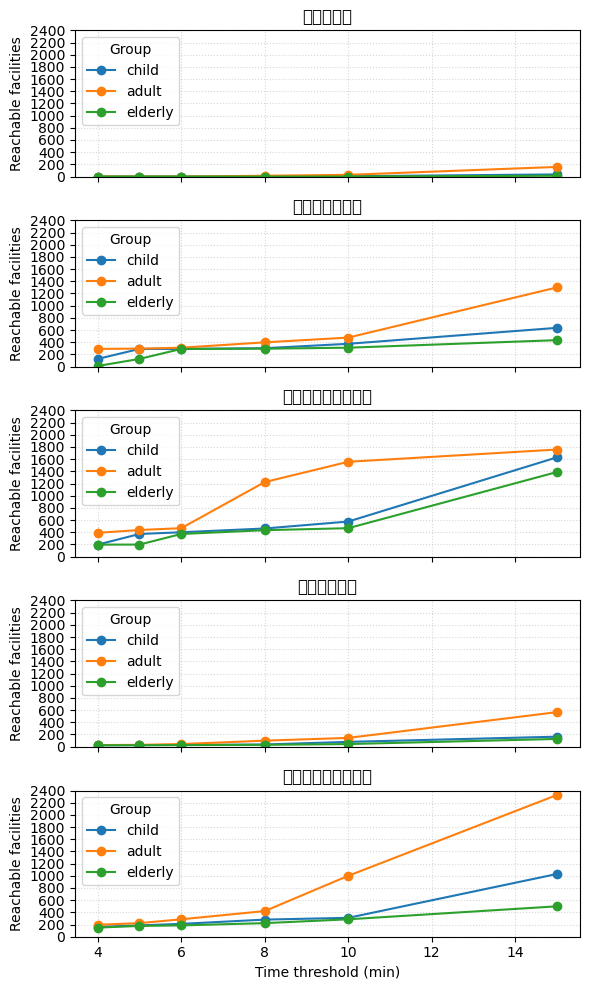

In [ ]:
import matplotlib.pyplot as plt

# Multi-level threshold list 
time_vals = [4, 5, 6, 8, 10, 15]  # min

# community Latitude & Longitude & Projection
#  lon/lat（EPSG:4490）  
committee_coords = {
    "金安居委会":        (121.491967, 31.284764), # Jian Community
    "同济新村居委会":    (121.509834, 31.283388), # Tongjixincun Community
    "鞍山四村第三居委会":(121.507797, 31.275515), # Anshansicun No.3 Community
    "密云路居委会":      (121.496867, 31.278469), # Miyunlu Community 
    "铁岭路九十弄居委会":(121.511304, 31.279358), # Tielinglu No.9 Community
}

# Converting a GeoDataFrame and projecting it
centers = gpd.GeoDataFrame(
    [
        {"committee": name, 
         "geometry": gpd.points_from_xy([lon],[lat])[0]}
    for name,(lon,lat) in committee_coords.items()],
    crs="EPSG:4490"
).to_crs(epsg=32651)

# make lookup dict： committee → (x_proj, y_proj)
proj_centers = {
    row["committee"]: (row.geometry.x, row.geometry.y)
    for _,row in centers.iterrows()
}

# pre-calculate shortest paths for each community
# output
rows = []
for committee,(x0,y0) in proj_centers.items():
    #  Finding the Nearest Neighbourhood Network Node
    orig_node = ox.distance.nearest_nodes(G_proj, x0, y0)
    # Calculate the shortest distance (in metres) to all nodes at once
    dist_map = nx.single_source_dijkstra_path_length(G_proj, orig_node, weight="length")
    
    #    Iteration for 3 populations, 6 min, 6 types of functions 
    for group, speed in walking_speeds.items():
        for t in time_vals:
            cutoff = speed * t  
            total = 0
            # Functionality per category is cumulative
            for func, gdf in poi_gdfs.items():
                for pt in gdf.geometry:
                    node = ox.distance.nearest_nodes(G_proj, pt.x, pt.y)
                    if dist_map.get(node, float("inf")) <= cutoff:
                        total += 1
            rows.append({
                "committee": committee,
                "group":     group,
                "time_min":  t,
                "count":     total
            })

#  DataFrame & Pivot & SAVE 
df = pd.DataFrame(rows)
df_pivot = df.pivot_table(
    index=["committee","group"],
    columns="time_min",
    values="count"
).reset_index()
df_pivot.to_csv("multi_threshold_access_counts.csv", index=False)
print("已导出 multi_threshold_access_counts.csv") # exported

# drawing
fig, axes = plt.subplots(
    nrows=len(proj_centers), ncols=1,
    figsize=(6, 2*len(proj_centers)), sharex=True, sharey=True
)

for ax, committee in zip(axes, proj_centers):
    sub = df[df["committee"] == committee]
    for group in walking_speeds:
        grp = sub[sub["group"] == group]
        ax.plot(
            grp["time_min"], grp["count"],
            marker="o", label=group
        )
    ax.set_title(committee, fontsize=12)
    ax.set_ylabel("Reachable facilities")
    ax.legend(title="Group", loc="upper left")
    ax.grid(True, ls=":", alpha=0.5)
    
    # Add y-axis range and scale 
    ax.set_ylim(0, 2000)
    ax.set_yticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000,2200, 2400])

axes[-1].set_xlabel("Time threshold (min)")
plt.tight_layout()
plt.savefig("multi_threshold_accessibility_curves.png", dpi=300)
plt.show()

In [ ]:
# read CSV
df_pop = pd.read_csv("siping_population_by_age_structure.csv")
df_pop = df_pop.rename(columns={"村居委会": "committee"}) # {"communityty "committee"}

# read SHP
gdf_bdy = gpd.read_file("shanghai_population.shp", encoding="gb2312")
gdf_bdy = gdf_bdy.rename(columns={"村居委": "committee"})  # {"community": "committee"}

# Screening of five communities
target_names = [
    "金安居委会", "同济新村居委会", "鞍山四村第三居委会", "密云路居委会", "铁岭路九十弄居委会" # Jian Community, Tongjixincun Community, Anshansicun No.3 Community, Miyunlu Community, Tielinglu No.9 Community
]
df_pop = df_pop[df_pop["committee"].isin(target_names)]
gdf_comm = gdf_bdy[gdf_bdy["committee"].isin(target_names)]

# Merge data with geometry
gdf_comm = gdf_comm.merge(df_pop, on="committee")

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox
import networkx as nx

# parameter setting
T = {
    "habitation": 1,
    "employment": 2,
    "commerce":   3,
    "healthcare": 1,
    "education":  1,
    "recreation": 2
}
kappa = 1.0
walking_speed = walking_speeds["adult"]  # adult
threshold = 15  # minutes
cutoff = walking_speed * threshold  # Reachable radius (metres)

# read data
# read CSV
df_pop = pd.read_csv("siping_population_by_age_structure.csv")
df_pop = df_pop.rename(columns={"村居委会": "committee"}) # {‘community’: ‘committee’}

# read SHP
gdf_bdy = gpd.read_file("shanghai_population.shp", encoding="gb2312")
gdf_bdy = gdf_bdy.rename(columns={"村居委": "committee"})  # {‘community’: ‘committee’}

# five communities
target_names = [
    "金安居委会", "同济新村居委会", "鞍山四村第三居委会", "密云路居委会", "铁岭路九十弄居委会" # Jian Community, Tongjixincun Community, Anshansicun No.3 Community, Miyunlu Community, Tielinglu No.9 Community
]
df_pop = df_pop[df_pop["committee"].isin(target_names)]
gdf_comm = gdf_bdy[gdf_bdy["committee"].isin(target_names)]

# Consolidation into data with geometry
gdf_comm = gdf_comm.merge(df_pop, on="committee")

# Setting up the projection
# If gdf_comm has no projection information, set it; otherwise, convert directly to UTM coordinate system.
if gdf_comm.crs is None:
    gdf_comm = gdf_comm.set_crs(epsg=4326)
gdf_comm = gdf_comm.to_crs(epsg=32651)

# Calculate the number of accessible facilities for each function under the 15-minute threshold for adults S_jf
# Setting Thresholds
threshold = 15  # minutes

rows = []

# Calculate shortest route maps for each community
dist_maps = {}
for com, (x, y) in proj_centers.items():
    orig = ox.distance.nearest_nodes(G_proj, x, y)
    dist_maps[com] = nx.single_source_dijkstra_path_length(G_proj, orig, weight="length")

# Iterate through each community, each population and each function to calculate the number of accessible facilities
for com, dist_map in dist_maps.items():
    for group, speed in walking_speeds.items():
        cutoff = speed * threshold  # 15 minutes walking distance, Unit: metres
        for func, gdf in poi_gdfs.items():
            count = sum(
                1 for pt in gdf.geometry
                if dist_map.get(
                    ox.distance.nearest_nodes(G_proj, pt.x, pt.y), 
                    float('inf')
                ) <= cutoff
            )
            rows.append({
                "committee": com,
                "group": group,
                "function": func,
                "S_jfg": count
            })

# make DataFrame
df_sjfg = pd.DataFrame(rows)
df_sjfg.to_csv("S_jfg_by_committee_group_function.csv", index=False)
print("完成：每个居委会、群体、功能下的可达设施数 S_jfg 已导出。") # print(‘Done: the number of reachable facilities under each communityty group, function S_jfg has been exported.’)

完成：每个居委会、群体、功能下的可达设施数 S_jfg 已导出。


Done: the number of reachable facilities under each communityty group, function S_jfg has been exported.

In [21]:
print(gdf_bdy.crs)

None


In [22]:
print(poi_gdfs.keys())

dict_keys(['education', 'employment', 'commerce', 'recreation', 'healthcare', 'habitation'])


In [ ]:
# Calculation of FPR, SDI, SRI by subpopulations
group_pop_columns = {
    "child": "estimated_children",
    "adult": "estimated_adults",
    "elderly": "estimated_elderly60"
}

# Output Dictionary Storage Results
group_fpr_sdi_sri = {}

for group, pop_col in group_pop_columns.items():
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()

    # Merging geometry and population
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]

        gdf_group[f"FPR_{func}"] = Ci / Pi
        gdf_group[f"SDI_{func}"] = ((Pi - kappa * Ci) / Pi).clip(lower=0)
        gdf_group[f"SRI_{func}"] = ((kappa * Ci - Pi) / Pi).clip(lower=0)

    # Save results
    group_fpr_sdi_sri[group] = gdf_group

# FPR

In [ ]:
# Construct Population+Boundary GeoDataFrame with S-values for each of the three populations
gdfs_grouped = {}

for group in ["child", "adult", "elderly"]:
    df_S = df_sjfg[df_sjfg["group"] == group]
    df_S = df_S.pivot(index="committee", columns="function", values="S_jfg").reset_index()
    df_S.columns.name = None  
    df_S = df_S.rename(columns={col: f"{col}_{group}" for col in df_S.columns if col != "committee"})
    
    gdfs_grouped[group] = gdf_comm.merge(df_S, on="committee")

In [ ]:
# Define the population field corresponding to the crowd
pop_fields = {
    "child": "estimated_children",
    "adult": "estimated_adults",
    "elderly": "estimated_elderly60"  
}

# Calculate FPR for each category
for group in ["child", "adult", "elderly"]:
    gdf = gdfs_grouped[group]
    P = gdf[pop_fields[group]]

    for func in T.keys():
        C = gdf[f"{func}_{group}"]
        gdf[f"FPR_{func}_{group}"] = C / P

    # Save the result back to dict
    gdfs_grouped[group] = gdf

In [28]:
gdfs_grouped["adult"][["committee", "FPR_healthcare_adult", "FPR_employment_adult"]]

committee  FPR_healthcare_adult  FPR_employment_adult
0  鞍山四村第三居委会              0.000088              0.000274
1    同济新村居委会              0.000023              0.000184
2     密云路居委会              0.000017              0.000110
3  铁岭路九十弄居委会              0.000102              0.000356
4      金安居委会              0.000002              0.000010

In [ ]:
# Initialising an empty list
records = []

# Iterate through the GeoDataFrame corresponding to each population
for group, gdf_group in gdfs_grouped.items():
    for _, row in gdf_group.iterrows():
        committee = row['committee']
        for func in T:
            col_name = f'FPR_{func}_{group}'
            if col_name in row:
                records.append({
                    'committee': committee,
                    'group': group,
                    'function': func,
                    'FPR': row[col_name]
                })

# Convert to DataFrame View
df_all_fpr = pd.DataFrame(records)

# Sort by community, group, function 
df_all_fpr = df_all_fpr.sort_values(by=['committee', 'group', 'function'])

# Show previous lines
display(df_all_fpr)

committee    group    function       FPR
38    同济新村居委会    adult    commerce  0.000509
40    同济新村居委会    adult   education  0.000146
37    同济新村居委会    adult  employment  0.000184
36    同济新村居委会    adult  habitation  0.000105
39    同济新村居委会    adult  healthcare  0.000023
..        ...      ...         ...       ...
64  鞍山四村第三居委会  elderly   education  0.000375
61  鞍山四村第三居委会  elderly  employment  0.000610
60  鞍山四村第三居委会  elderly  habitation  0.000327
63  鞍山四村第三居委会  elderly  healthcare  0.000226
65  鞍山四村第三居委会  elderly  recreation  0.000261

[90 rows x 4 columns]

In [30]:
gdf_fpr = gdf_comm.merge(df_all_fpr, on="committee")

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

def plot_fpr_maps(group, gdf_fpr, funcs=T.keys()):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
    axes = axes.flatten()

    for ax, func in zip(axes, funcs):
        col = f"FPR_{func}_{group}"  # e.g. FPR_healthcare_elderly
        gdf_fpr.plot(
            column=col,
            ax=ax,
            cmap="OrRd",
            scheme="Quantiles",
            k=5,
            legend=True,
            edgecolor="black",
            linewidth=0.5
        )
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, crs=gdf_fpr.crs)
        ax.set_title(f"{group} - FPR: {func}", fontsize=12)
        ax.axis("off")

    plt.tight_layout()
    plt.savefig(f"fig4_8_FPR_heatmap_{group}.png", dpi=300)
    plt.show()

In [32]:
print(df_all_fpr.columns.tolist())

['committee', 'group', 'function', 'FPR']


findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

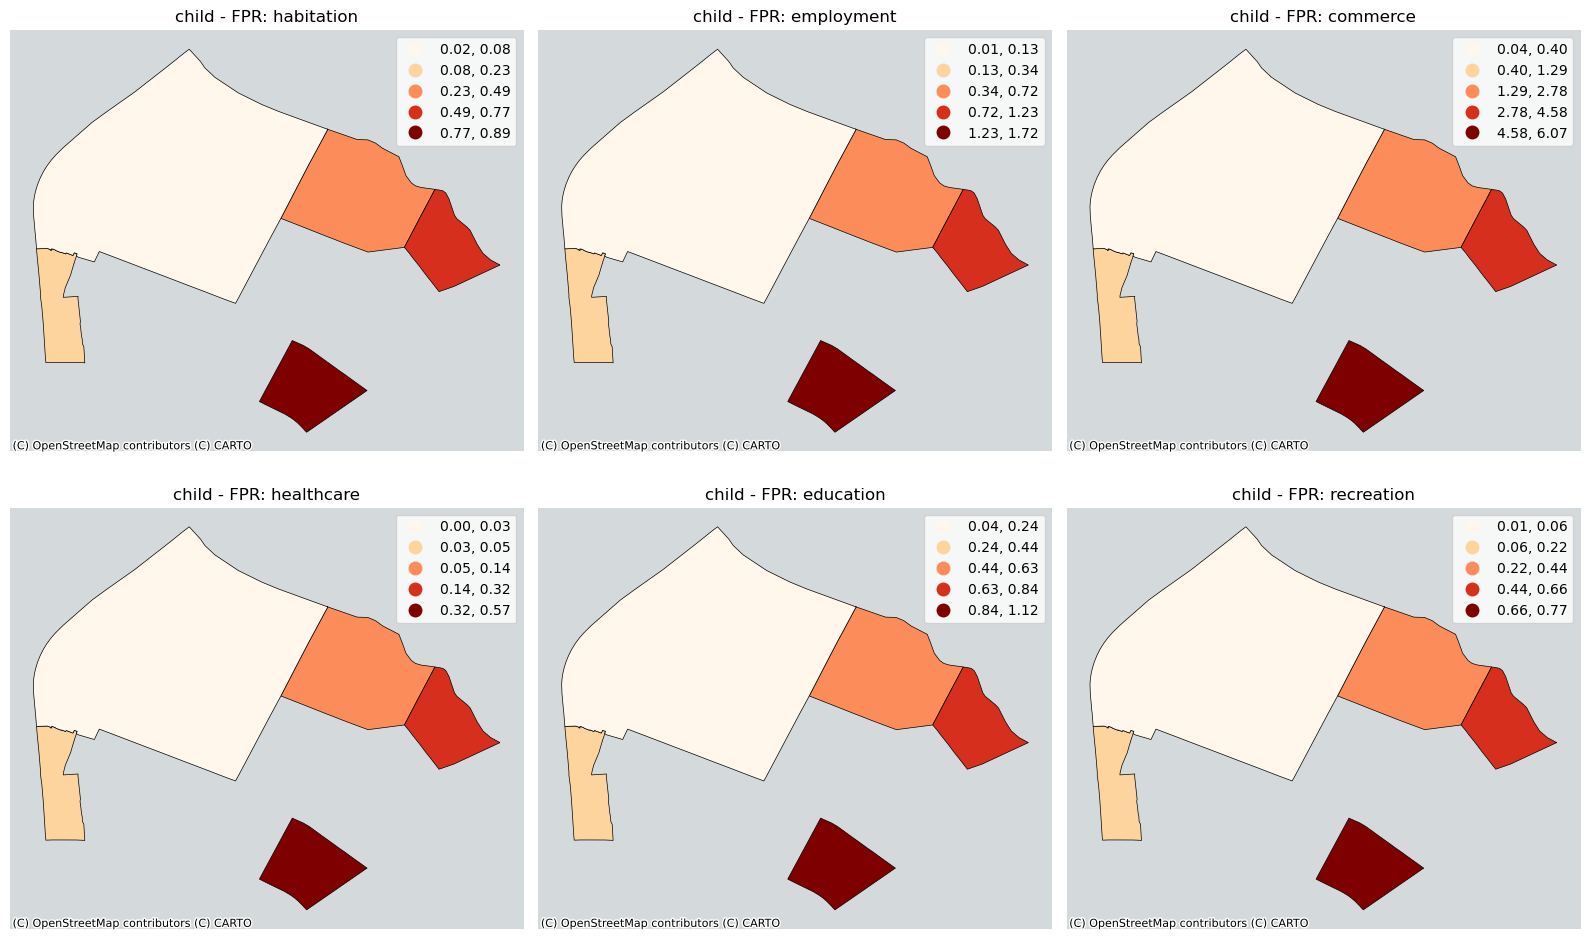

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx

# Separately, the three populations are extracted from df_fpr_long
gdf_fpr_child = gdf_comm.merge(df_all_fpr[df_all_fpr["group"] == "child"], on="committee")
gdf_fpr_adult = gdf_comm.merge(df_all_fpr[df_all_fpr["group"] == "adult"], on="committee")
gdf_fpr_elderly = gdf_comm.merge(df_all_fpr[df_all_fpr["group"] == "elderly"], on="committee")

# FPR Forms for Three Groups Splice and Grow Format
df_all_fpr_long = pd.concat([
    gdf_fpr_child[["committee", "group", "function", "FPR"]],
    gdf_fpr_adult[["committee", "group", "function", "FPR"]],
    gdf_fpr_elderly[["committee", "group", "function", "FPR"]]
], ignore_index=True)

# Merge FPR table with gdf_comm (neighbourhood community with geometry)
gdf_fpr = gdf_comm.copy()
group = "child"  # "child", "adult", "elderly"

# Keep only the FPR of the group
df_group = df_all_fpr_long[df_all_fpr_long["group"] == group]
gdf_fpr = gdf_fpr.merge(df_group, on="committee")

# Setting the function sequence
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]

# drawing
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, func in enumerate(functions):
    ax = axes[i]
    gdf_fpr[gdf_fpr["function"] == func].plot(
        column="FPR",
        ax=ax, cmap="OrRd", scheme="Quantiles", k=5, legend=True,
        edgecolor="black", linewidth=0.5
    )
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, crs=gdf_fpr.crs)
    ax.set_title(f"{group} - FPR: {func}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.savefig(f"fig4_8_FPR_heatmap_{group}.png", dpi=300)
plt.show()

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

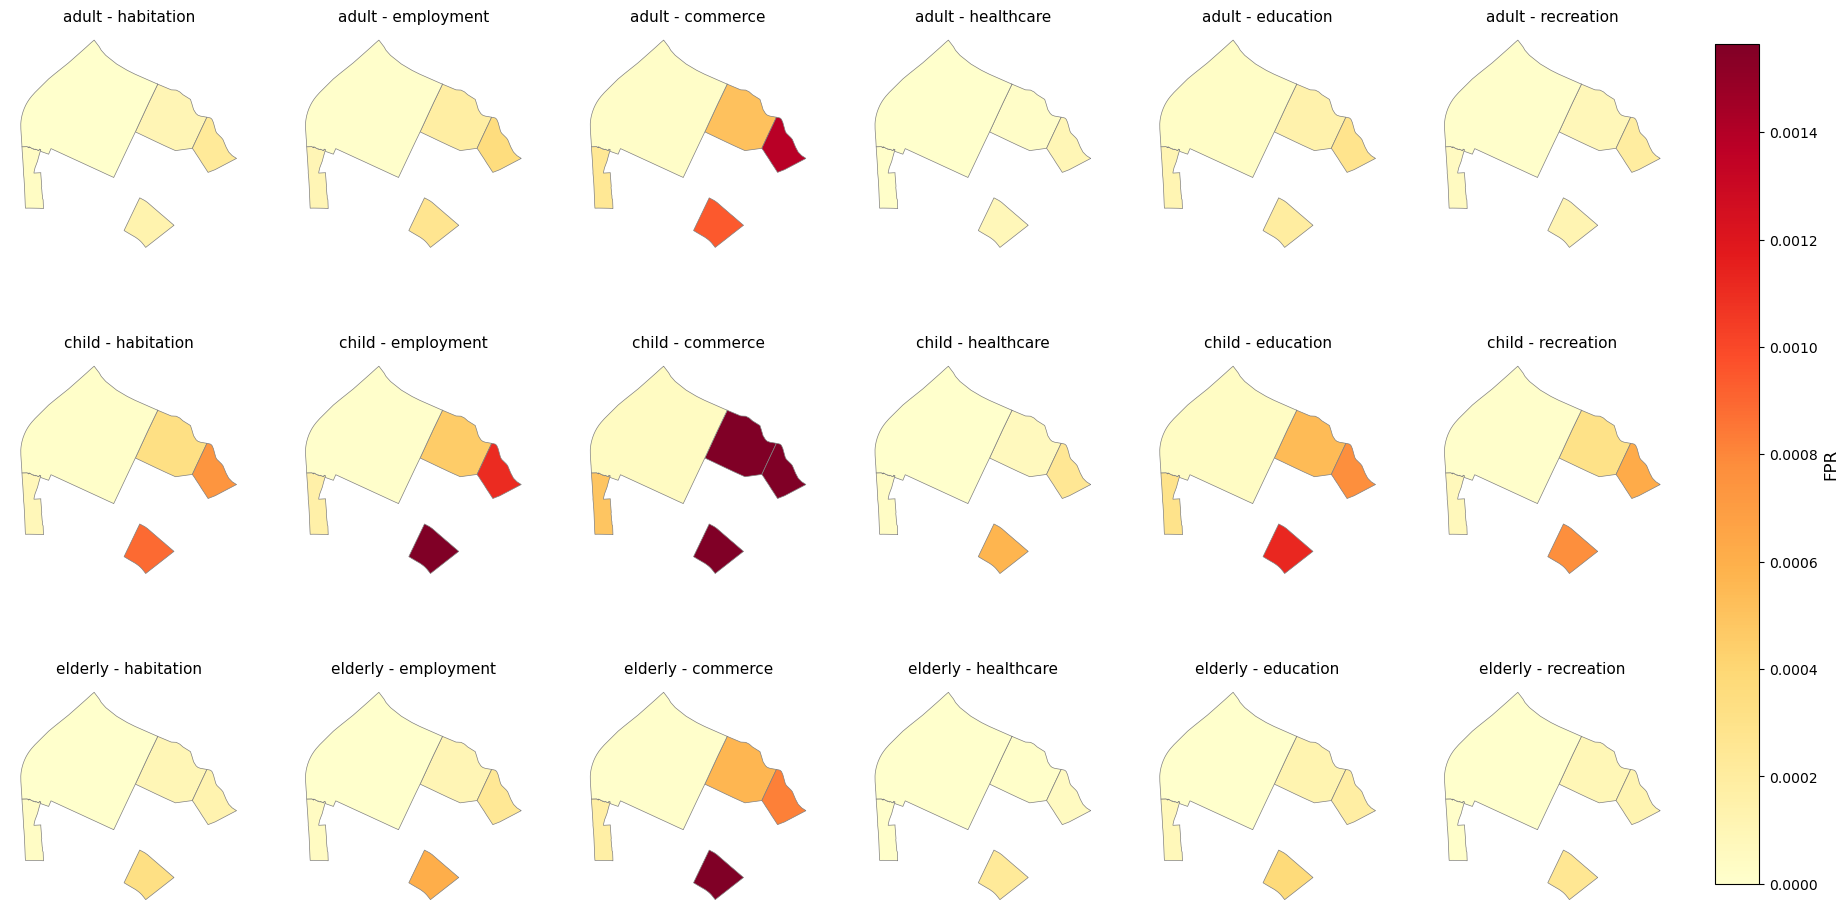

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as ctx

# Order of the three groups
groups = ["adult", "child", "elderly"]
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]

# Consolidation of data
gdf_fpr_all = gdf_comm.merge(df_all_fpr, on="committee")

# Manually limit the colour range
vmin = 0
vmax = gdf_fpr_all["FPR"].quantile(0.95)  # Increased contrast

# Creating 3x6 subgraphs
fig, axes = plt.subplots(len(groups), len(functions), figsize=(22, 12))
axes = axes.reshape(len(groups), len(functions))

for i, group in enumerate(groups):
    for j, func in enumerate(functions):
        ax = axes[i, j]
        # Filtering data
        gdf_plot = gdf_fpr_all[(gdf_fpr_all["group"] == group) & (gdf_fpr_all["function"] == func)]
        gdf_plot.plot(column="FPR", ax=ax, cmap="YlOrRd", vmin=vmin, vmax=vmax, legend=False,
                      edgecolor="grey", linewidth=0.5)
        ax.set_title(f"{group} - {func}", fontsize=11)
        ax.axis("off")


# Adjust the layout to leave the right side empty
fig.subplots_adjust(right=0.88)  # Reserve space on the right

# Manually create a colour bar area
cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])  # [x position, y position, width, height]

# Generate Colour Bars
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm, cax=cax, orientation="vertical")
cbar.set_label("FPR", fontsize=12)

plt.savefig("fig_FPR_heatmap_allgroups_allfunctions_orange_rightbar.png", dpi=300, bbox_inches='tight')
plt.show()

# Setting the heat meter

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

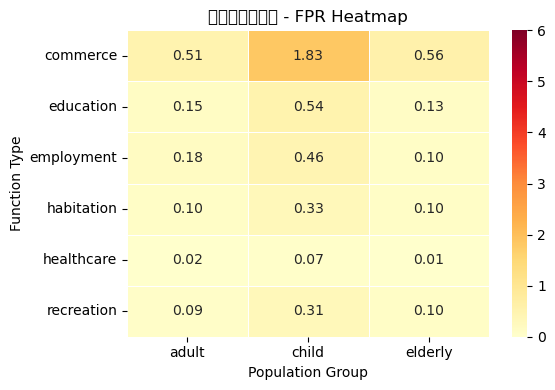

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

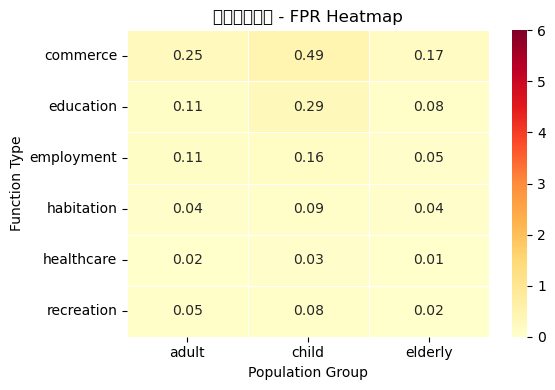

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

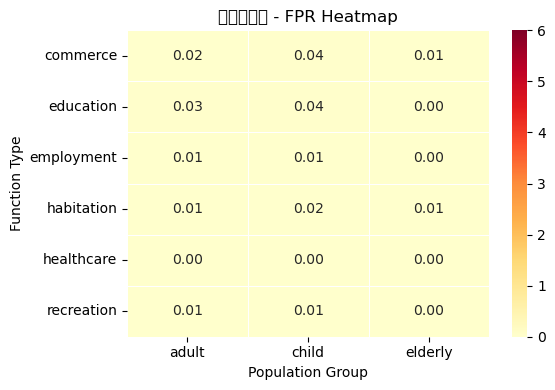

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

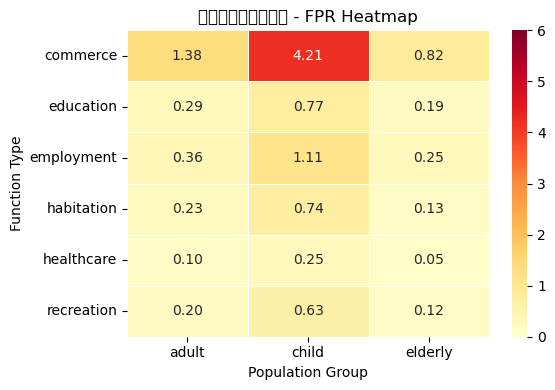

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

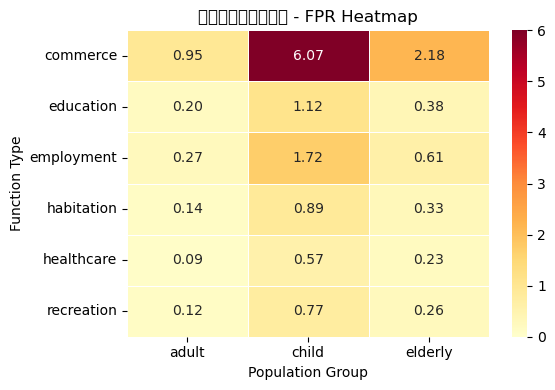

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# df_all_fpr is the data used, the structure is:
# columns: [“committee”, “group”, “function”, “FPR”]

# Get the names of all communities
committees = df_all_fpr["committee"].unique()

# Development of a heat map for each communities
for committee_name in committees:
    # Filtering data for this community
    df_sub = df_all_fpr[df_all_fpr["committee"] == committee_name]

    # Heat table: function is the index, group is the column, and FPR is the value.
    pivot_table = df_sub.pivot(index='function', columns='group', values='FPR')

    # Drawing heat tables
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        pivot_table, 
        annot=True, 
        cmap="YlOrRd", 
        linewidths=.5, 
        fmt=".2f",
        vmin=0,
    vmax=6
    )
    
    plt.title(f"{committee_name} - FPR Heatmap")
    plt.ylabel("Function Type")
    plt.xlabel("Population Group")
    plt.tight_layout()
    plt.savefig(f"heatmap_fpr_{committee_name}.png", dpi=300)
    plt.show()

# SDI

In [122]:
df_sjfg[df_sjfg["S_jfg"] == 0].groupby(["group", "function"]).count()

committee  S_jfg
group   function                    
elderly education           1      1
        employment          1      1

/opt/conda/lib/python3.11/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because n

<Figure size 640x480 with 0 Axes>

findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif' not found because none of the following families were found: STHeiti
findfont: Generic family 'sans-serif'

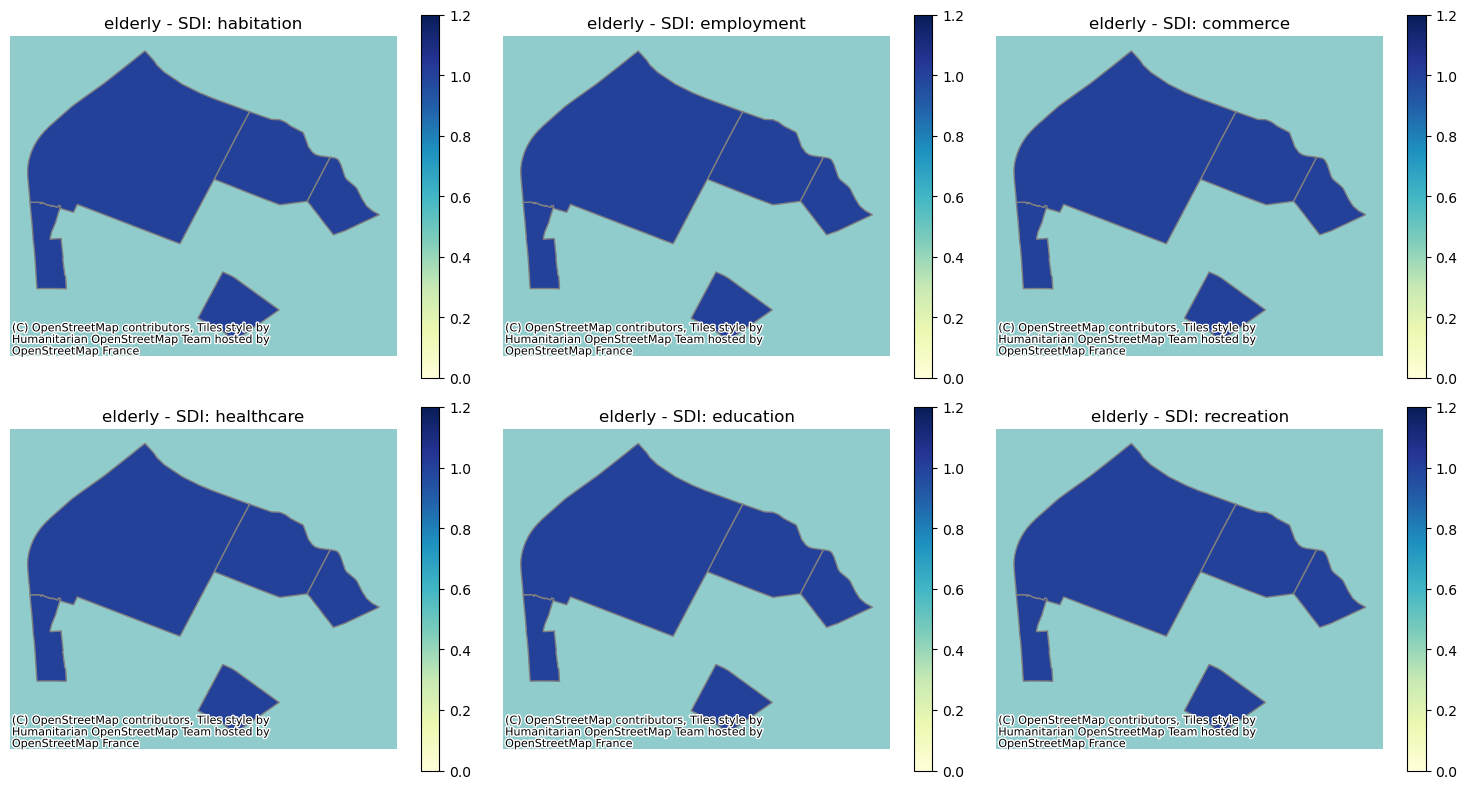

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import contextily as ctx

# gdf_comm: GeoDataFrame with geometry and population fields:
# gdf_comm: GeoDataFrame with geometry and population fields
# df_sjfg: number of reachable facilities under each community, function, population
# group = 'elderly'
# group_pop_columns defined

# If gdf_group does not have a CRS, manually set the
gdf_group = gdf_group.set_crs(epsg=32651)

# Parameter setting
kappa = 0.01  # Thresholds for the number of people served by each facility
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]
pop_col = group_pop_columns["elderly"]

# Screening of data on older persons
df_group = df_sjfg[df_sjfg["group"] == "elderly"]
df_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()
gdf_group = gdf_comm.merge(df_pivot, on="committee")
# Setting the initial crs
if gdf_comm.crs is None:
    gdf_comm = gdf_comm.set_crs(epsg=32651)

gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

# setting crs
if gdf_group.crs is None:
    gdf_group = gdf_group.set_crs(gdf_comm.crs)

# Convert to a projection supported by the basemap
gdf_group = gdf_group.to_crs(epsg=3857)

# Adding a base map
ctx.add_basemap(ax, crs=gdf_group.crs)

# Calculating SDI
for func in functions:
    C = gdf_group[func].fillna(0)
    P = gdf_group[pop_col]
    gdf_group[f"SDI_{func}"] = ((P - kappa * C) / P).clip(lower=0)

# Harmonisation of the mapping range (0 to 1.2)
vmin, vmax = 0, 1.2

#Drawing SDI heat maps (one per function)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, func in enumerate(functions):
    ax = axes[i]
    gdf_group.plot(
        column=f"SDI_{func}", 
        ax=ax, 
        legend=True, 
        cmap="YlGnBu", 
        vmin=vmin, vmax=vmax,
        edgecolor='gray'
    )
    ax.set_title(f"elderly - SDI: {func}")
    ax.axis("off")
    ctx.add_basemap(ax, crs=gdf_group.crs.to_string())

plt.tight_layout()
plt.savefig("fig4_9_SDI_heatmap_elderly_adjusted.png", dpi=300)
plt.show()

In [126]:
print(gdf_comm.crs)

None


In [ ]:
gdf_comm = gdf_comm.set_crs(epsg=32651) 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import geopandas as gpd
import seaborn as sns
import contextily as ctx
import warnings

# Close findfont warning
warnings.filterwarnings("ignore", message=".*findfont.*")

#  Setting Chinese fonts
# Replace with the actual path of your font file
font_path = "Chinese/SourceHanSansSC-Regular.otf"
chinese_font = fm.FontProperties(fname=font_path)

# Setting matplotlib default fonts to Chinese fonts
plt.rcParams["font.family"] = chinese_font.get_name()

In [ ]:
#  Parameter setting
kappa_dict = {
    "habitation": 10,
    "employment": 20,
    "commerce": 50,
    "healthcare": 30,
    "education": 25,
    "recreation": 40
}
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]
groups = ["child", "adult", "elderly"]

vmin = gdf_SDI["SDI"].min()
vmax = gdf_SDI["SDI"].max()

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

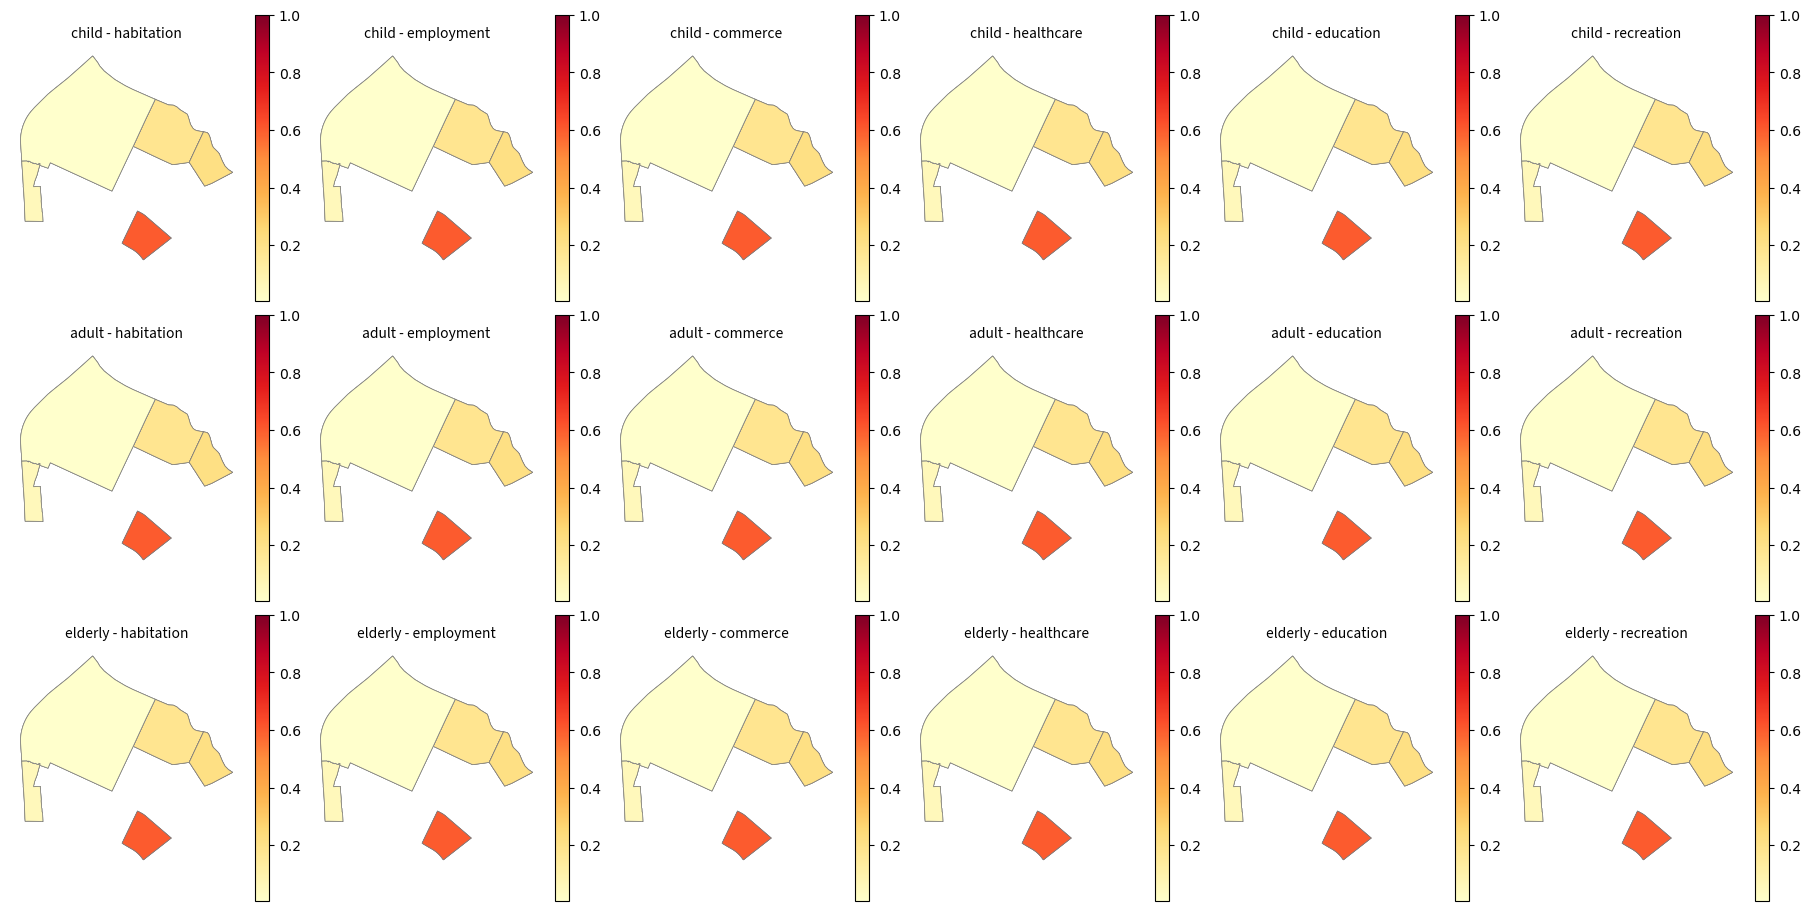

✅ SDI 热力图生成完毕！


In [ ]:
# Creation of subgraphs: 3 rows × 6 columns
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9), constrained_layout=True)

for row, group in enumerate(groups):
    pop_col = group_pop_columns[group]

    # Get the number of accessible facilities for the current crowd S_jfg
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()

    # Consolidation of spatial data on communities
    gdf_group = gdf_comm.merge(df_pivot, on="committee")

    # Setting the coordinate system (WGS84 → Web Mercator)
    if gdf_group.crs is None:
        gdf_group = gdf_group.set_crs(epsg=32651)
    gdf_group = gdf_group.to_crs(epsg=3857)

    # Calculate SDI for each function
    for func in functions:
        C = gdf_group[func].fillna(0)
        P = gdf_group[pop_col]
        kappa = kappa_dict[func]
        gdf_group[f"SDI_{func}"] = ((P - kappa * C) / P).clip(lower=0)

    # drawing
    for col, func in enumerate(functions):
        ax = axes[row, col]
        gdf_SDI.plot(column="SDI", cmap="YlOrRd", legend=True,
             edgecolor="gray", linewidth=0.5,
             vmin=vmin, vmax=vmax, ax=ax)
        ax.set_title(f"{group} - {func}", fontsize=10, fontproperties=chinese_font)
        ax.axis("off")
# Saving images
plt.savefig("fig4_9_SDI_heatmap_3groups_6functions.png", dpi=300)
plt.show()

print("✅ SDI 热力图生成完毕！") # print(‘✅ SDI heat map generated!’)

print(‘✅ SDI heat map generated!’)

In [ ]:
# pivot table: S_jfg for the different groups under each community × function
df_pivot = df_sjfg.pivot_table(index=["committee", "group"], 
                               columns="function", 
                               values="S_jfg", 
                               fill_value=0).reset_index()

#  Normalise each column (each function) and multiply by the weight T to calculate the SDI
func_list = list(T.keys())
for f in func_list:
    max_val = df_pivot[f].max()
    if max_val != 0:
        df_pivot[f] = df_pivot[f] / max_val * T[f]
    else:
        df_pivot[f] = 0  

# Calculation of SDI
df_pivot["SDI"] = df_pivot[func_list].sum(axis=1) / sum(T.values())

# Merge SDI back into spatial data
gdf_SDI = gdf_comm.merge(df_pivot, on="committee")

In [48]:
gdf_SDI.head()

OBJECTID  城市名 城市代  辖区名   辖区代    街道镇       街道_1  committee          村居_1  \
0      1476  上海市  31  杨浦区  3101  四平路街道  310110009  鞍山四村第三居委会  310110009005   
1      1476  上海市  31  杨浦区  3101  四平路街道  310110009  鞍山四村第三居委会  310110009005   
2      1476  上海市  31  杨浦区  3101  四平路街道  310110009  鞍山四村第三居委会  310110009005   
3      1483  上海市  31  杨浦区  3101  四平路街道  310110009    同济新村居委会  310110009012   
4      1483  上海市  31  杨浦区  3101  四平路街道  310110009    同济新村居委会  310110009012   

   SHAPE_Leng  ...  estimated_elderly60  estimated_elderly65    group  \
0    0.012264  ...        349132.833180        243083.529931    adult   
1    0.012264  ...        349132.833180        243083.529931    child   
2    0.012264  ...        349132.833180        243083.529931  elderly   
3    0.018178  ...        430108.496597        299462.787999    adult   
4    0.018178  ...        430108.496597        299462.787999    child   

   commerce  education  employment  habitation healthcare  recreation  \
0  2.252983   0.761538    1.685185    0.657143   0.946237    1.278689   
1  2.119332   0.630769    1.549383    0.619048   0.903226    1.234973   
2  1.816229   0.503846    1.314815    0.542857   0.849462    0.994536   
3  1.494033   0.688462    1.395062    0.614286   0.301075    1.224044   
4  0.787589   0.373077    0.506173    0.280952   0.129032    0.612022   

        SDI  
0  0.758177  
1  0.705673  
2  0.602175  
3  0.571696  
4  0.268885  

[5 rows x 36 columns]

/tmp/ipykernel_2132/1874729549.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Purples")
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfo

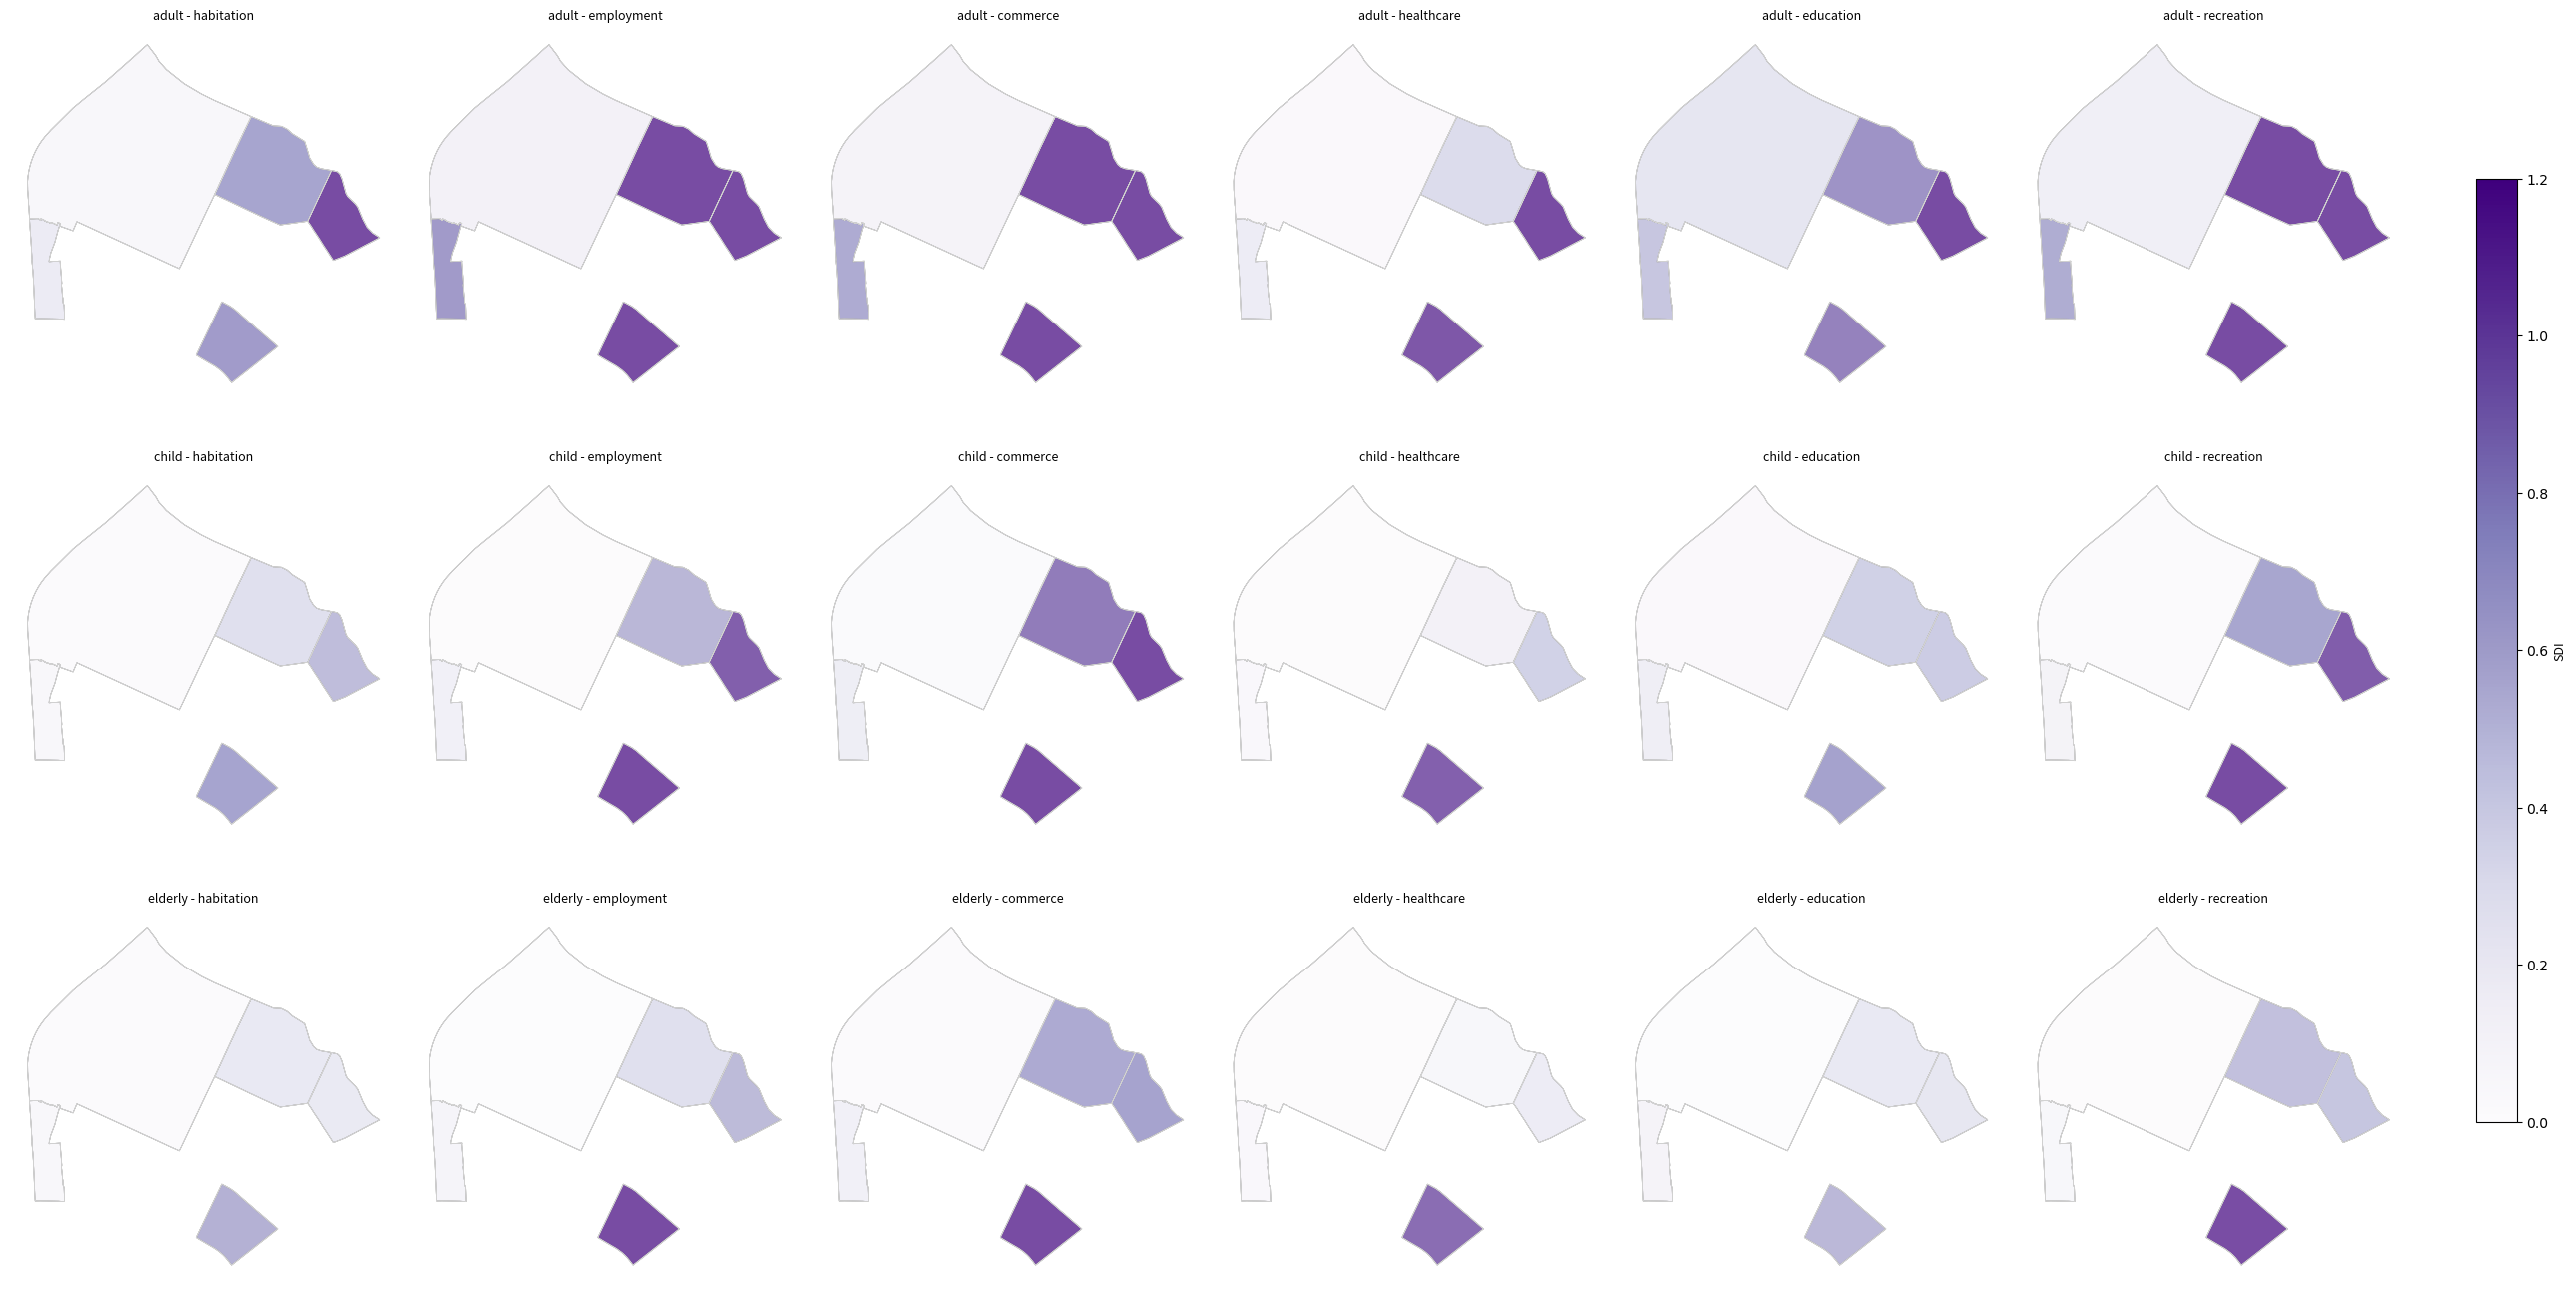

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.font_manager import FontProperties

# Setting Chinese fonts
chinese_font = FontProperties(fname="Chinese/SourceHanSansSC-Regular.otf", size=9)

# List of groups and functions
groups = gdf_SDI['group'].unique()
functions = list(T.keys())  

# Creating a subgraph canvas
fig, axes = plt.subplots(len(groups), len(functions), figsize=(4.5 * len(functions), 4.5 * len(groups)))
if len(groups) == 1:
    axes = [axes]  
elif len(functions) == 1:
    axes = [[ax] for ax in axes]

# Global normalised colour mapping
norm = Normalize(vmin=0, vmax=1.2)
cmap = cm.get_cmap("Purples")

# drawing
for i, group in enumerate(groups):
    for j, func in enumerate(functions):
        ax = axes[i][j]
        
        # Filtering the data set
        gdf_sub = gdf_SDI[gdf_SDI['group'] == group].copy()
        sdi_col = func 
        if sdi_col not in gdf_sub.columns:
            continue
        
        # Drawing of base map boundaries
        gdf_SDI.boundary.plot(ax=ax, color="lightgrey", linewidth=0.5)
        
        # drawing
        gdf_sub.plot(ax=ax,
                     markersize=gdf_sub[sdi_col] * 500,  
                     color=gdf_sub[sdi_col].map(cmap),
                     alpha=0.7,
                     edgecolor='k',
                     linewidth=0.5)
        
        # title
        ax.set_title(f"{group} - {func}", fontproperties=chinese_font)
        ax.axis("off")

# Add colour bar, position set individually
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # left, bottom, width, height
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("SDI", fontproperties=chinese_font)

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.savefig("SDI_heatmap_allgroups_allfunctions.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the required fields (with groups, communities, functional facilities, SDI values)
heat_df = gdf_SDI[["committee", "group", "commerce", "education", "employment", 
                   "habitation", "healthcare", "recreation"]].copy()

#  Setting Functional Fields to MultiIndex Columns
heat_df = heat_df.melt(id_vars=["committee", "group"], 
                       var_name="function", value_name="SDI")

# Splice column name as ‘function-group’
heat_df["func_group"] = heat_df["function"] + " - " + heat_df["group"]

#  index is community, columns are func_groups.
heat_pivot = heat_df.pivot(index="committee", columns="func_group", values="SDI")

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

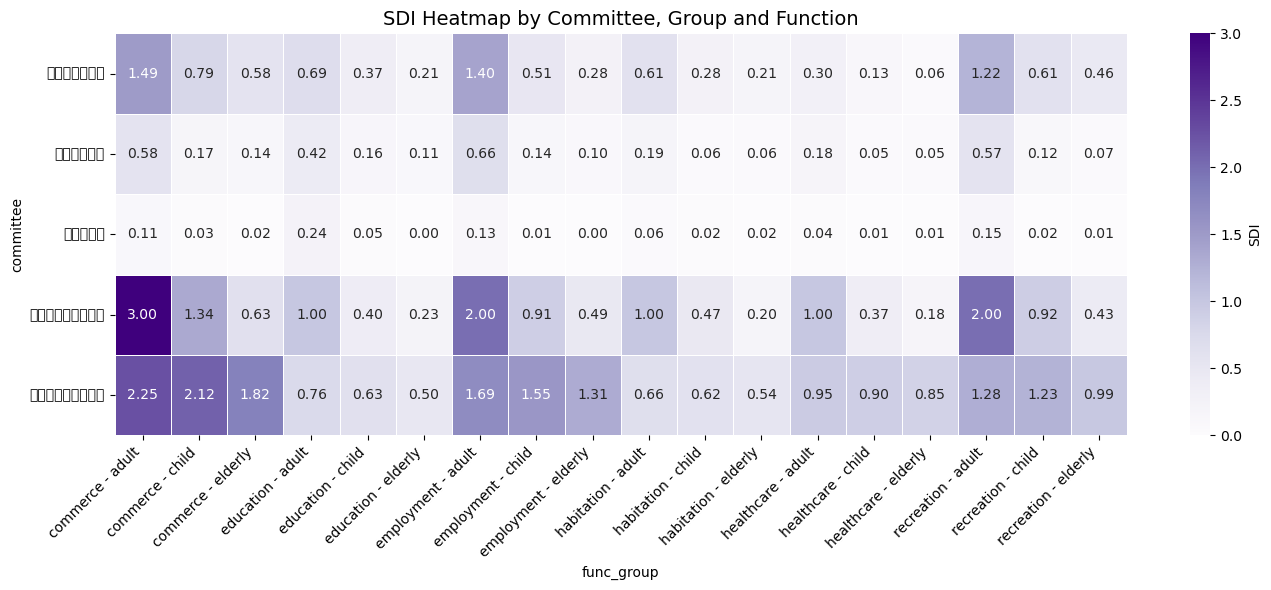

In [ ]:
# Setting the image size and ribbon style
plt.figure(figsize=(14, 6))
sns.heatmap(heat_pivot, cmap="Purples", annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'SDI'})

plt.title("SDI Heatmap by Committee, Group and Function", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [62]:
plt.savefig("fig4_9_SDI_heatmap_table.png", dpi=300)  # or .pdf

<Figure size 640x480 with 0 Axes>

# SRI 

In [ ]:
# Merge the gdfs of the three groups into one large dataframe
gdf_SRI = pd.concat(group_fpr_sdi_sri.values(), ignore_index=True)

In [65]:
print(gdf_SRI.columns)

Index(['OBJECTID', '城市名', '城市代', '辖区名', '辖区代', '街道镇', '街道_1', 'committee',
       '村居_1', 'SHAPE_Leng', 'SHAPE_Area', '村居_12', '辖区_x', '乡镇街', '常驻总',
       '常驻户', '常驻流', 'geometry', '村居委代码', '辖区_y', '乡镇街道', '常驻总人口', '常驻户籍人口',
       '常驻流动人口', 'estimated_children', 'estimated_adults',
       'estimated_elderly60', 'estimated_elderly65', 'commerce', 'education',
       'employment', 'habitation', 'healthcare', 'recreation',
       'FPR_habitation', 'SDI_habitation', 'SRI_habitation', 'FPR_employment',
       'SDI_employment', 'SRI_employment', 'FPR_commerce', 'SDI_commerce',
       'SRI_commerce', 'FPR_healthcare', 'SDI_healthcare', 'SRI_healthcare',
       'FPR_education', 'SDI_education', 'SRI_education', 'FPR_recreation',
       'SDI_recreation', 'SRI_recreation'],
      dtype='object')


## when kappa=1

In [ ]:
# Calculating FPR, SDI, SRI 
kappa = 1

group_pop_columns = {
    "child": "estimated_children",
    "adult": "estimated_adults",
    "elderly": "estimated_elderly60"
}

group_fpr_sdi_sri = {}

for group, pop_col in group_pop_columns.items():
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()

    # Merging geometry and population
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]

        # FPR: supply-to-demand ratio
        gdf_group[f"FPR_{func}"] = Ci / Pi

        # SDI: supply deficit
        gdf_group[f"SDI_{func}"] = ((Pi - kappa * Ci) / Pi).clip(lower=0)

        # SRI: supply redundancy
        gdf_group[f"SRI_{func}"] = ((kappa * Ci - Pi) / Pi).clip(lower=0)

    # save result
    group_fpr_sdi_sri[group] = gdf_group

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

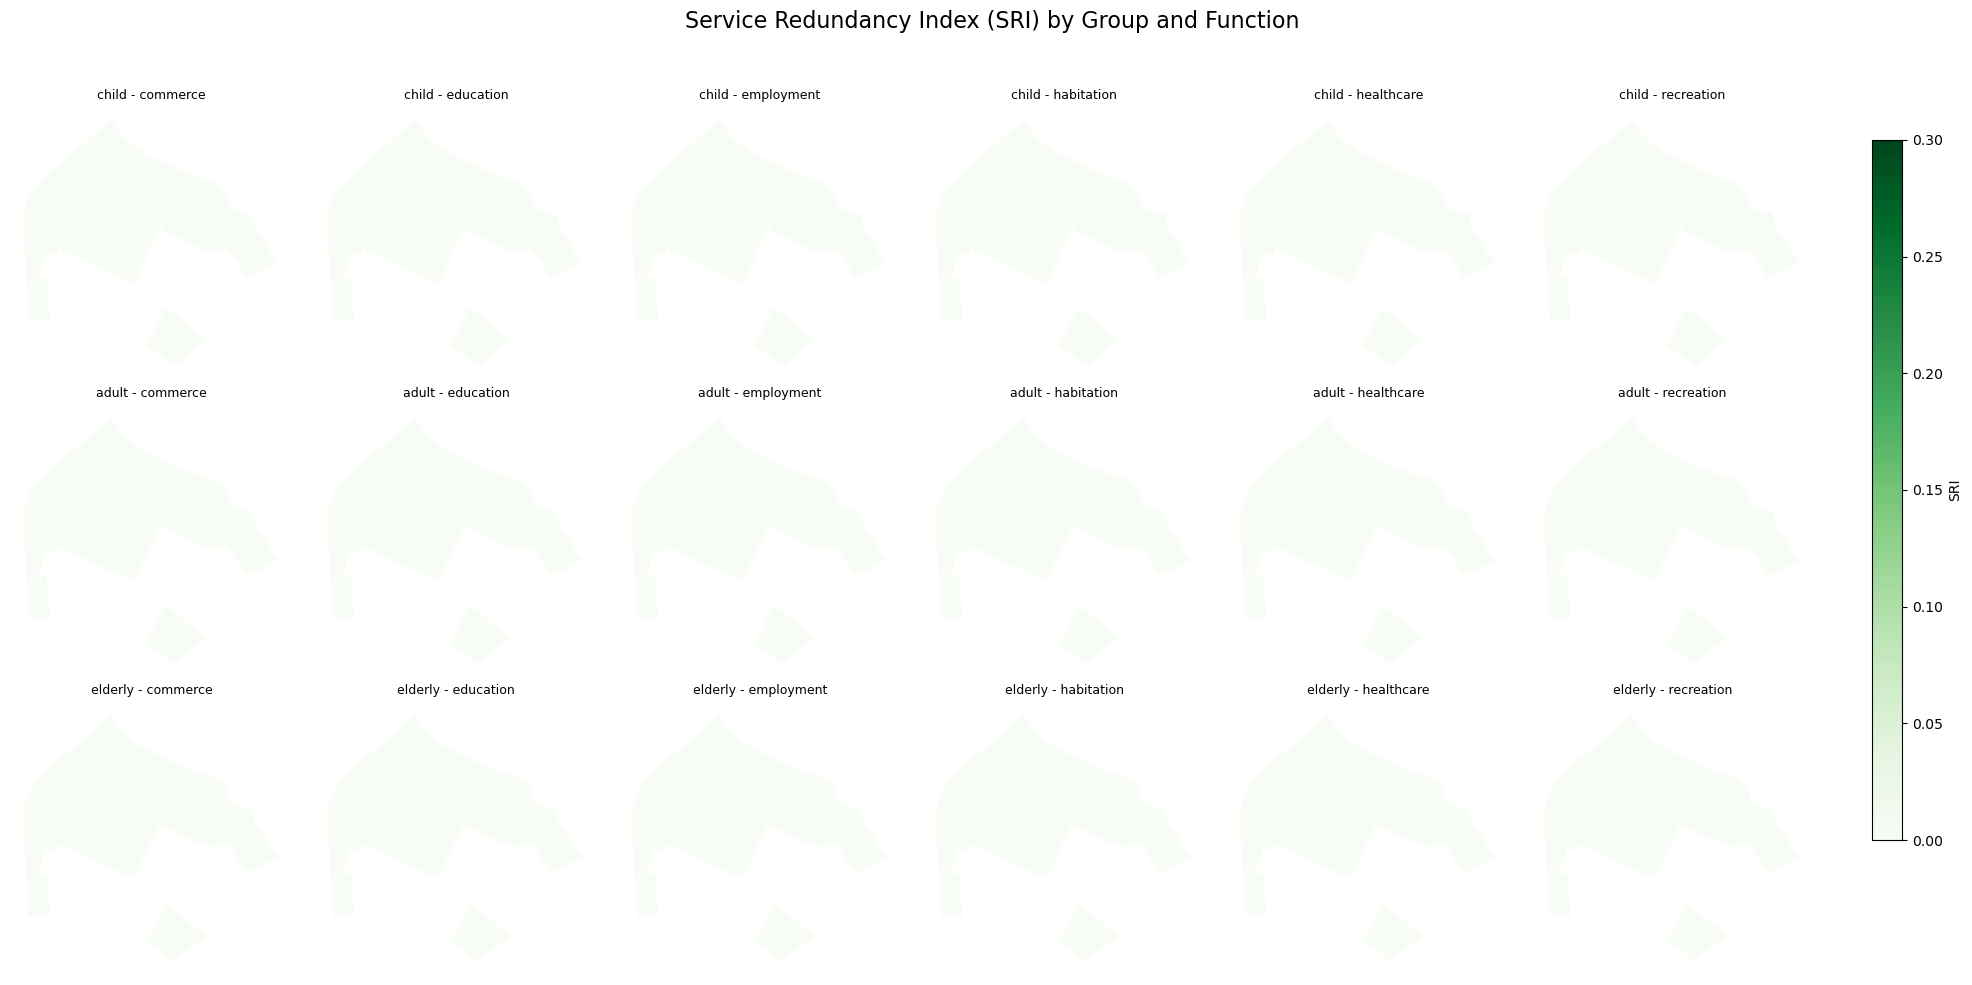

In [ ]:
import matplotlib.pyplot as plt

# Groups and Functional Settings
groups = ["child", "adult", "elderly"]
functions = ["commerce", "education", "employment", "habitation", "healthcare", "recreation"]


# —Colour and image settings
cmap = "Greens"  # colour mapping
fig, axes = plt.subplots(len(groups), len(functions), figsize=(20, 10))
vmin, vmax = 0, 0.3  # SRI value range

for i, group in enumerate(groups):
    for j, func in enumerate(functions):
        ax = axes[i, j]
        
        #  SRI_recreation
        col_name = f"SRI_{func}"
        
        # Filtering group correspondence data
        sub = gdf_SRI[gdf_SRI["group"] == group]
        
        # drawing
        sub.plot(column=col_name, cmap=cmap, linewidth=0.5, edgecolor='white',
                 ax=ax, legend=False, vmin=vmin, vmax=vmax)

        ax.set_title(f"{group} - {func}", fontsize=9)
        ax.axis("off")

# Add colour bar
fig.subplots_adjust(right=0.92)
cax = fig.add_axes([0.94, 0.15, 0.015, 0.7])  # Colour bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, label="SRI")

plt.suptitle("Service Redundancy Index (SRI) by Group and Function", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.savefig("fig4_10_SRI_map_grid.png", dpi=300)
plt.show()

In [ ]:
# Defining Function Lists
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]

# Cyclic printing of SRI columns for each function
for func in functions:
    print(f"\n--- SRI_{func} ---")
    print(gdf_SRI[f"SRI_{func}"])


--- SRI_habitation ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_habitation, dtype: float64

--- SRI_employment ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_employment, dtype: float64

--- SRI_commerce ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_commerce, dtype: float64

--- SRI_healthcare ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_healthcare, dtype: float64

--- SRI_education ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0

In [90]:
for group, pop_col in group_pop_columns.items():
    print(f"\n=== {group.upper()} ===")
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]
        print(f"\nFunction: {func}")
        print("Facilities (Ci):", Ci.values)
        print("Population (Pi):", Pi.values)
        print("kappa * Ci:", (kappa * Ci).values)
        print("kappa * Ci - Pi:", (kappa * Ci - Pi).values)
        print("SRI:", ((kappa * Ci - Pi) / Pi).clip(lower=0).values)


=== CHILD ===

Function: habitation
Facilities (Ci): [130  59  13  99   5]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [130  59  13  99   5]
kappa * Ci - Pi: [-146133.6889288  -180128.16480758 -143008.58517348 -133459.8595787
 -300640.81652944]
SRI: [0. 0. 0. 0. 0.]

Function: employment
Facilities (Ci): [251  82  23 148   2]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [251  82  23 148   2]
kappa * Ci - Pi: [-146012.6889288  -180105.16480758 -142998.58517348 -133410.8595787
 -300643.81652944]
SRI: [0. 0. 0. 0. 0.]

Function: commerce
Facilities (Ci): [888 330  70 562  13]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [888 330  70 562  13]
kappa * Ci - Pi: [-145375.6889288  -179857.16480758 -142951.58517348 -132996.8595787
 -300632.81652944]
SRI: [0. 0. 0. 0. 0.]

Function: healthcare
Facil

In [ ]:
for func in T:
    Ci = gdf_SRI[func]         # Number of facilities per category
    Pi = gdf_SRI["常驻总人口"]   # Pi = gdf_SRI[‘Total resident population’]
    print(f"\n--- {func} ---")
    print("Ci:", Ci.values)
    print("Pi:", Pi.values)
    print("kappa * Ci:", (kappa * Ci).values)
    print("kappa * Ci - Pi:", (kappa * Ci - Pi).values)


--- habitation ---
Ci: [130  59  13  99   5 138 129  40 210  12 114  44  12  42   4]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [130  59  13  99   5 138 129  40 210  12 114  44  12  42   4]
kappa * Ci - Pi: [ -5419  -6777  -5413  -4968 -11401  -5411  -6707  -5386  -4857 -11394
  -5435  -6792  -5414  -5025 -11402]

--- employment ---
Ci: [251  82  23 148   2 273 226 107 324  21 213  45  16  79   0]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [251  82  23 148   2 273 226 107 324  21 213  45  16  79   0]
kappa * Ci - Pi: [ -5298  -6754  -5403  -4919 -11404  -5276  -6610  -5319  -4743 -11385
  -5336  -6791  -5410  -4988 -11406]

--- commerce ---
Ci: [ 888  330   70  562   13  944  626  241 1257   45  761  243   59  262
    7]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [ 888  330   70  562   13  

## when kappa=0.1

In [ ]:
# Calculate FPR, SDI, SRI
kappa = 0.1

group_pop_columns = {
    "child": "estimated_children",
    "adult": "estimated_adults",
    "elderly": "estimated_elderly60"
}

group_fpr_sdi_sri = {}

for group, pop_col in group_pop_columns.items():
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()

    # Merging geometry and population
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]

        # FPR: supply-to-demand ratio
        gdf_group[f"FPR_{func}"] = Ci / Pi

        # SDI: supply deficit
        gdf_group[f"SDI_{func}"] = ((Pi - kappa * Ci) / Pi).clip(lower=0)

        # SRI: supply redundancy
        gdf_group[f"SRI_{func}"] = ((kappa * Ci - Pi) / Pi).clip(lower=0)

    # save result
    group_fpr_sdi_sri[group] = gdf_group

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

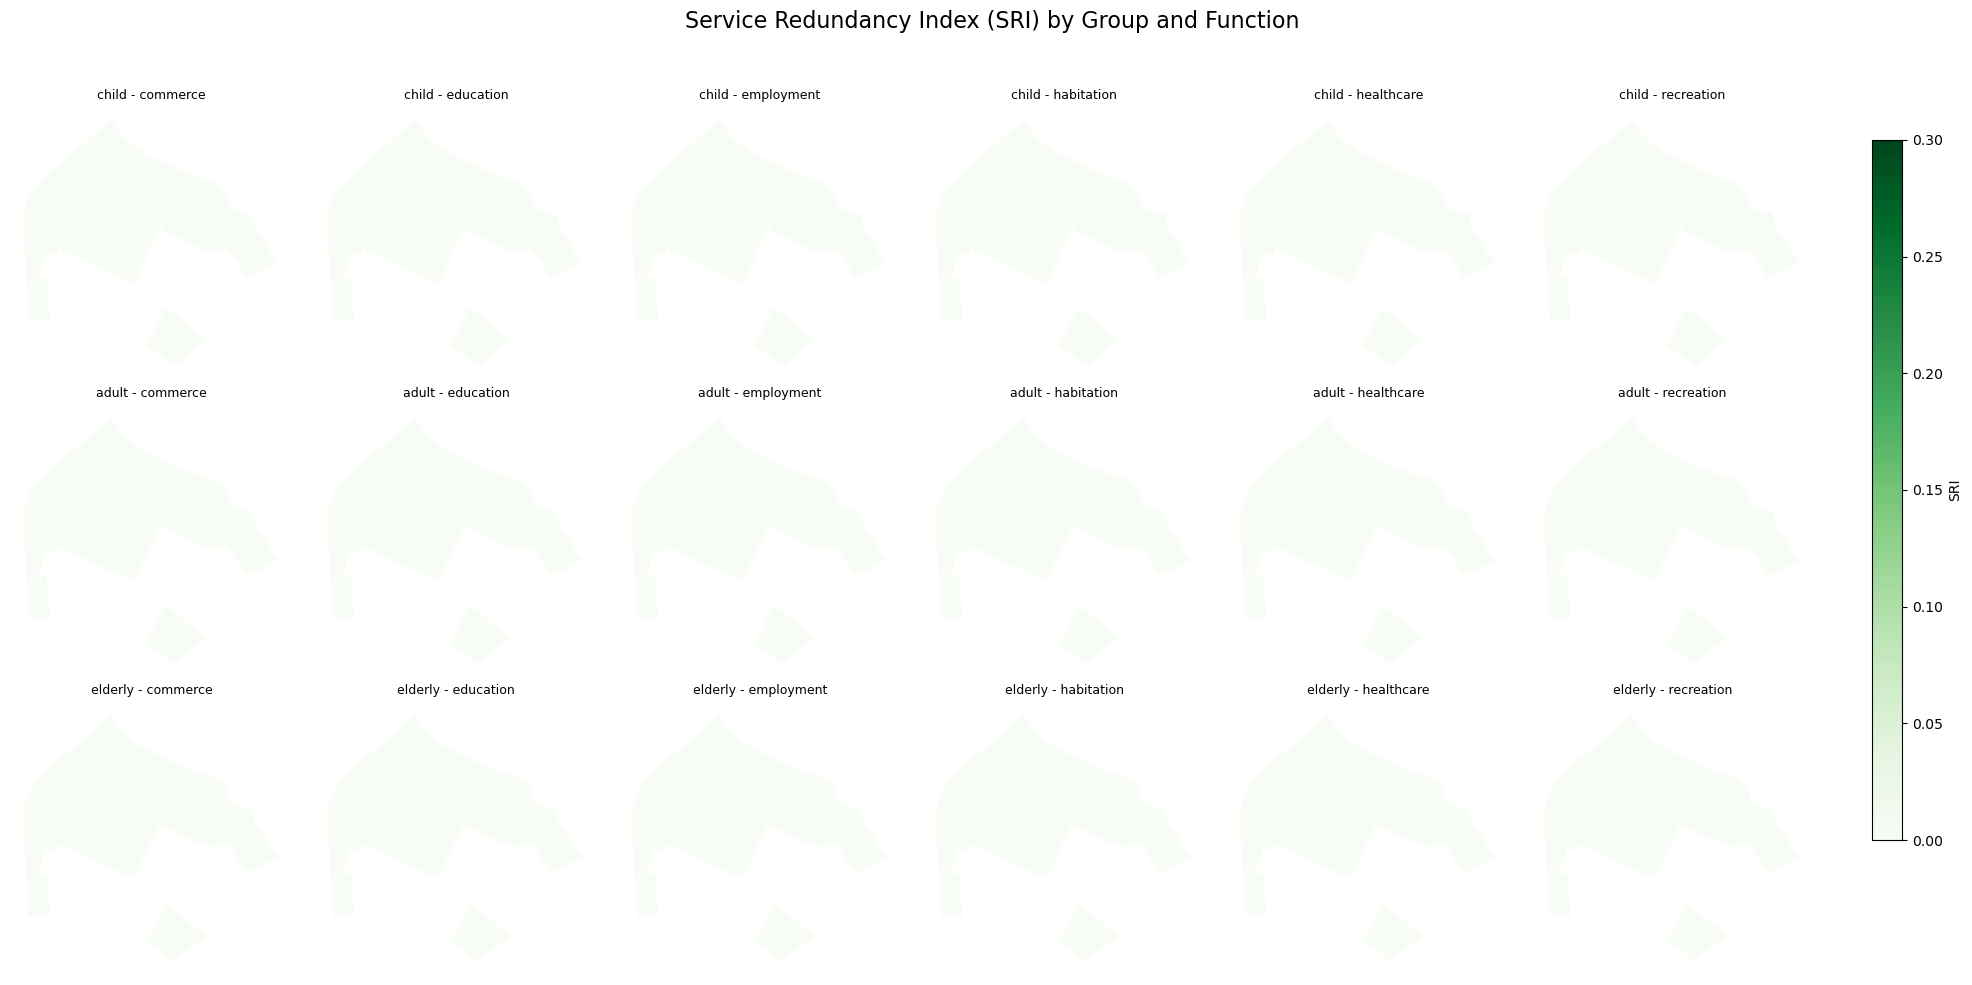

In [ ]:
import matplotlib.pyplot as plt

# Groups and Functional Settings
groups = ["child", "adult", "elderly"]
functions = ["commerce", "education", "employment", "habitation", "healthcare", "recreation"]


#  Colour and image settings 
cmap = "Greens"  # colour mapping
fig, axes = plt.subplots(len(groups), len(functions), figsize=(20, 10))
vmin, vmax = 0, 0.3  # SRI value range

for i, group in enumerate(groups):
    for j, func in enumerate(functions):
        ax = axes[i, j]
        
        #  SRI_recreation
        col_name = f"SRI_{func}"
        
        # Filtering group correspondence data
        sub = gdf_SRI[gdf_SRI["group"] == group]
        
        # drawing
        sub.plot(column=col_name, cmap=cmap, linewidth=0.5, edgecolor='white',
                 ax=ax, legend=False, vmin=vmin, vmax=vmax)

        ax.set_title(f"{group} - {func}", fontsize=9)
        ax.axis("off")

# Add colour bar
fig.subplots_adjust(right=0.92)
cax = fig.add_axes([0.94, 0.15, 0.015, 0.7])  # Colour bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, label="SRI")

plt.suptitle("Service Redundancy Index (SRI) by Group and Function", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.savefig("fig4_10_SRI_map_grid.png", dpi=300)
plt.show()

In [ ]:
# Defining Function Lists
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]

# Cyclic printing of SRI columns for each function
for func in functions:
    print(f"\n--- SRI_{func} ---")
    print(gdf_SRI[f"SRI_{func}"])


--- SRI_habitation ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_habitation, dtype: float64

--- SRI_employment ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_employment, dtype: float64

--- SRI_commerce ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_commerce, dtype: float64

--- SRI_healthcare ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_healthcare, dtype: float64

--- SRI_education ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0

In [95]:
for group, pop_col in group_pop_columns.items():
    print(f"\n=== {group.upper()} ===")
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]
        print(f"\nFunction: {func}")
        print("Facilities (Ci):", Ci.values)
        print("Population (Pi):", Pi.values)
        print("kappa * Ci:", (kappa * Ci).values)
        print("kappa * Ci - Pi:", (kappa * Ci - Pi).values)
        print("SRI:", ((kappa * Ci - Pi) / Pi).clip(lower=0).values)


=== CHILD ===

Function: habitation
Facilities (Ci): [130  59  13  99   5]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [13.   5.9  1.3  9.9  0.5]
kappa * Ci - Pi: [-146250.6889288  -180181.26480758 -143020.28517348 -133548.9595787
 -300645.31652944]
SRI: [0. 0. 0. 0. 0.]

Function: employment
Facilities (Ci): [251  82  23 148   2]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [25.1  8.2  2.3 14.8  0.2]
kappa * Ci - Pi: [-146238.5889288  -180178.96480758 -143019.28517348 -133544.0595787
 -300645.61652944]
SRI: [0. 0. 0. 0. 0.]

Function: commerce
Facilities (Ci): [888 330  70 562  13]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [88.8 33.   7.  56.2  1.3]
kappa * Ci - Pi: [-146174.8889288  -180154.16480758 -143014.58517348 -133502.6595787
 -300644.51652944]
SRI: [0. 0. 0. 0. 0.]

Function: h

In [ ]:
for func in T:
    Ci = gdf_SRI[func]         # Number of facilities per category
    Pi = gdf_SRI["常驻总人口"]   # Pi = gdf_SRI[‘Total resident population’]
    print(f"\n--- {func} ---")
    print("Ci:", Ci.values)
    print("Pi:", Pi.values)
    print("kappa * Ci:", (kappa * Ci).values)
    print("kappa * Ci - Pi:", (kappa * Ci - Pi).values)


--- habitation ---
Ci: [130  59  13  99   5 138 129  40 210  12 114  44  12  42   4]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [13.   5.9  1.3  9.9  0.5 13.8 12.9  4.  21.   1.2 11.4  4.4  1.2  4.2
  0.4]
kappa * Ci - Pi: [ -5536.   -6830.1  -5424.7  -5057.1 -11405.5  -5535.2  -6823.1  -5422.
  -5046.  -11404.8  -5537.6  -6831.6  -5424.8  -5062.8 -11405.6]

--- employment ---
Ci: [251  82  23 148   2 273 226 107 324  21 213  45  16  79   0]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [25.1  8.2  2.3 14.8  0.2 27.3 22.6 10.7 32.4  2.1 21.3  4.5  1.6  7.9
  0. ]
kappa * Ci - Pi: [ -5523.9  -6827.8  -5423.7  -5052.2 -11405.8  -5521.7  -6813.4  -5415.3
  -5034.6 -11403.9  -5527.7  -6831.5  -5424.4  -5059.1 -11406. ]

--- commerce ---
Ci: [ 888  330   70  562   13  944  626  241 1257   45  761  243   59  262
    7]
Pi: [ 5549  6836  5426  5067 11406  5549  683

## when kappa=10

In [ ]:
# Calculate FPR, SDI, SRI
kappa = 10

group_pop_columns = {
    "child": "estimated_children",
    "adult": "estimated_adults",
    "elderly": "estimated_elderly60"
}

group_fpr_sdi_sri = {}

for group, pop_col in group_pop_columns.items():
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()

    # Merging geometry and population
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]

        # FPR: supply-to-demand ratio
        gdf_group[f"FPR_{func}"] = Ci / Pi

        # SDI: supply deficit
        gdf_group[f"SDI_{func}"] = ((Pi - kappa * Ci) / Pi).clip(lower=0)

        # SRI: supply redundancy
        gdf_group[f"SRI_{func}"] = ((kappa * Ci - Pi) / Pi).clip(lower=0)

    # save result
    group_fpr_sdi_sri[group] = gdf_group

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

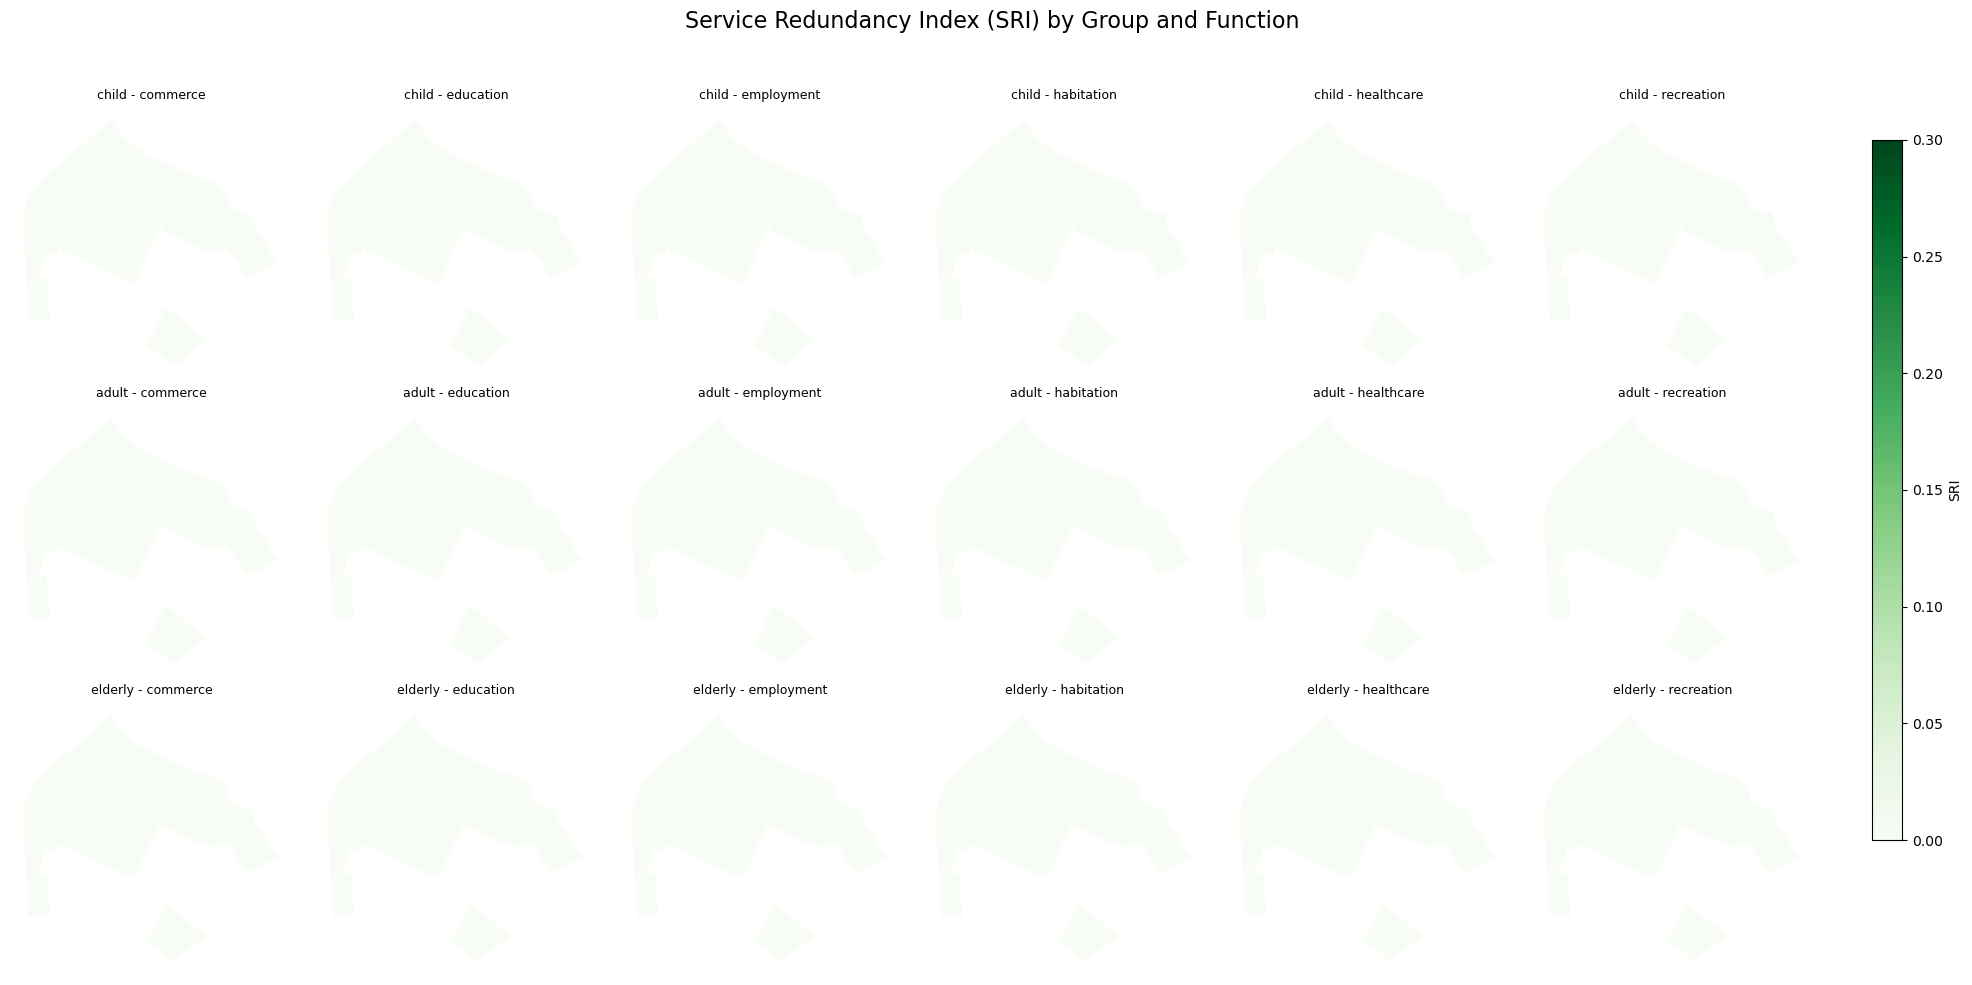

In [ ]:
import matplotlib.pyplot as plt

#  Groups and Functional Settings
groups = ["child", "adult", "elderly"]
functions = ["commerce", "education", "employment", "habitation", "healthcare", "recreation"]


# Colour and image settings
cmap = "Greens"  # colour mapping
fig, axes = plt.subplots(len(groups), len(functions), figsize=(20, 10))
vmin, vmax = 0, 0.3  # SRI value range

for i, group in enumerate(groups):
    for j, func in enumerate(functions):
        ax = axes[i, j]
        
        #  SRI_recreation
        col_name = f"SRI_{func}"
        
        # Filtering group correspondence data
        sub = gdf_SRI[gdf_SRI["group"] == group]
        
        # drawing
        sub.plot(column=col_name, cmap=cmap, linewidth=0.5, edgecolor='white',
                 ax=ax, legend=False, vmin=vmin, vmax=vmax)

        ax.set_title(f"{group} - {func}", fontsize=9)
        ax.axis("off")

# Add colour bar
fig.subplots_adjust(right=0.92)
cax = fig.add_axes([0.94, 0.15, 0.015, 0.7])  # Colour bar position
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, label="SRI")

plt.suptitle("Service Redundancy Index (SRI) by Group and Function", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.92, 0.95])
plt.savefig("fig4_10_SRI_map_grid.png", dpi=300)
plt.show()

In [ ]:
# Defining Function Lists
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]

# Cyclic printing of SRI columns for each function
for func in functions:
    print(f"\n--- SRI_{func} ---")
    print(gdf_SRI[f"SRI_{func}"])


--- SRI_habitation ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_habitation, dtype: float64

--- SRI_employment ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_employment, dtype: float64

--- SRI_commerce ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_commerce, dtype: float64

--- SRI_healthcare ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
Name: SRI_healthcare, dtype: float64

--- SRI_education ---
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0

In [100]:
for group, pop_col in group_pop_columns.items():
    print(f"\n=== {group.upper()} ===")
    df_group = df_sjfg[df_sjfg["group"] == group]
    df_group_pivot = df_group.pivot(index="committee", columns="function", values="S_jfg").reset_index()
    gdf_group = gdf_comm.merge(df_group_pivot, on="committee")

    for func in T:
        Ci = gdf_group[func]
        Pi = gdf_group[pop_col]
        print(f"\nFunction: {func}")
        print("Facilities (Ci):", Ci.values)
        print("Population (Pi):", Pi.values)
        print("kappa * Ci:", (kappa * Ci).values)
        print("kappa * Ci - Pi:", (kappa * Ci - Pi).values)
        print("SRI:", ((kappa * Ci - Pi) / Pi).clip(lower=0).values)


=== CHILD ===

Function: habitation
Facilities (Ci): [130  59  13  99   5]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [1300  590  130  990   50]
kappa * Ci - Pi: [-144963.6889288  -179597.16480758 -142891.58517348 -132568.8595787
 -300595.81652944]
SRI: [0. 0. 0. 0. 0.]

Function: employment
Facilities (Ci): [251  82  23 148   2]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [2510  820  230 1480   20]
kappa * Ci - Pi: [-143753.6889288  -179367.16480758 -142791.58517348 -132078.8595787
 -300625.81652944]
SRI: [0. 0. 0. 0. 0.]

Function: commerce
Facilities (Ci): [888 330  70 562  13]
Population (Pi): [146263.6889288  180187.16480758 143021.58517348 133558.8595787
 300645.81652944]
kappa * Ci: [8880 3300  700 5620  130]
kappa * Ci - Pi: [-137383.6889288  -176887.16480758 -142321.58517348 -127938.8595787
 -300515.81652944]
SRI: [0. 0. 0. 0. 0.]

Function: h

In [ ]:
for func in T:
    Ci = gdf_SRI[func]         # Number of facilities per category
    Pi = gdf_SRI["常驻总人口"]   # Pi = gdf_SRI[‘Total resident population’]
    print(f"\n--- {func} ---")
    print("Ci:", Ci.values)
    print("Pi:", Pi.values)
    print("kappa * Ci:", (kappa * Ci).values)
    print("kappa * Ci - Pi:", (kappa * Ci - Pi).values)


--- habitation ---
Ci: [130  59  13  99   5 138 129  40 210  12 114  44  12  42   4]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [1300  590  130  990   50 1380 1290  400 2100  120 1140  440  120  420
   40]
kappa * Ci - Pi: [ -4249  -6246  -5296  -4077 -11356  -4169  -5546  -5026  -2967 -11286
  -4409  -6396  -5306  -4647 -11366]

--- employment ---
Ci: [251  82  23 148   2 273 226 107 324  21 213  45  16  79   0]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa * Ci: [2510  820  230 1480   20 2730 2260 1070 3240  210 2130  450  160  790
    0]
kappa * Ci - Pi: [ -3039  -6016  -5196  -3587 -11386  -2819  -4576  -4356  -1827 -11196
  -3419  -6386  -5266  -4277 -11406]

--- commerce ---
Ci: [ 888  330   70  562   13  944  626  241 1257   45  761  243   59  262
    7]
Pi: [ 5549  6836  5426  5067 11406  5549  6836  5426  5067 11406  5549  6836
  5426  5067 11406]
kappa *

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 38797 (\N{CJK UNIFIED IDEOGRAPH-978D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarnin

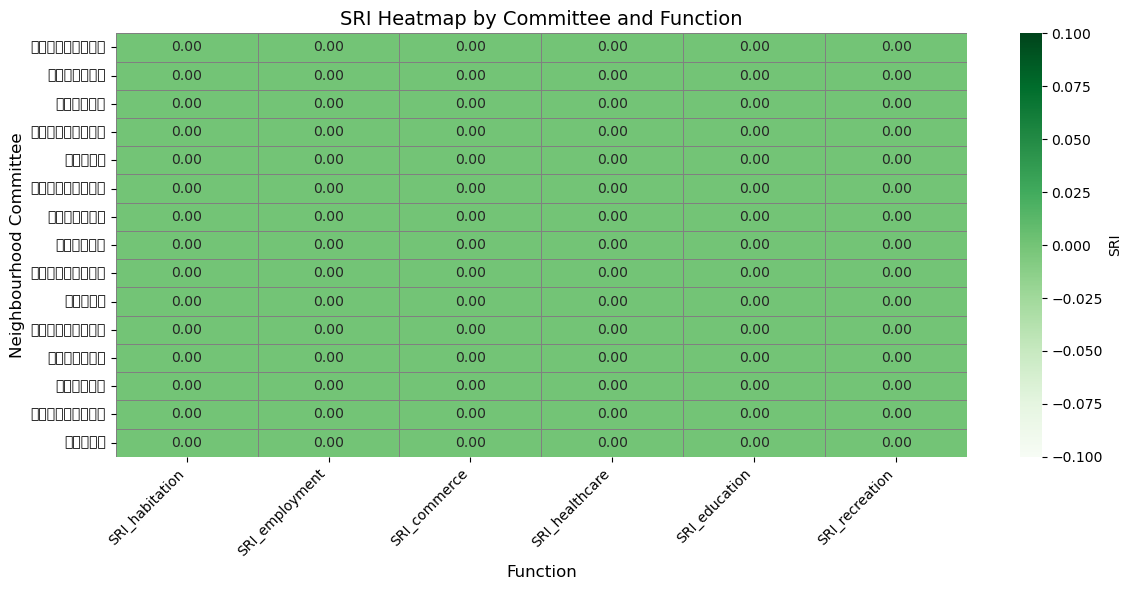

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting SRI data
functions = ["habitation", "employment", "commerce", "healthcare", "education", "recreation"]

# Preserve SRI Columns
SRI_df = gdf_SRI[[f"SRI_{func}" for func in functions]].copy()
SRI_df.index = gdf_SRI["committee"]  

# Creating a Heat Meter
plt.figure(figsize=(12, 6))
sns.heatmap(
    SRI_df,
    annot=True,                   
    fmt='.2f',                    
    cmap='Greens',                
    cbar=True,
    cbar_kws={'label': 'SRI'},    
    linewidths=.5,
    linecolor='gray',
    annot_kws={"size": 10}        
)

plt.title('SRI Heatmap by Committee and Function', fontsize=14)
plt.xlabel('Function', fontsize=12)
plt.ylabel('Neighbourhood Committee', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [117]:
plt.savefig("fig4_9_SRI_heatmap_table.png", dpi=300)  

<Figure size 640x480 with 0 Axes>

## When kappa = different values

findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Source Han Sans SC' not found.
findfont: Font family 'Sourc

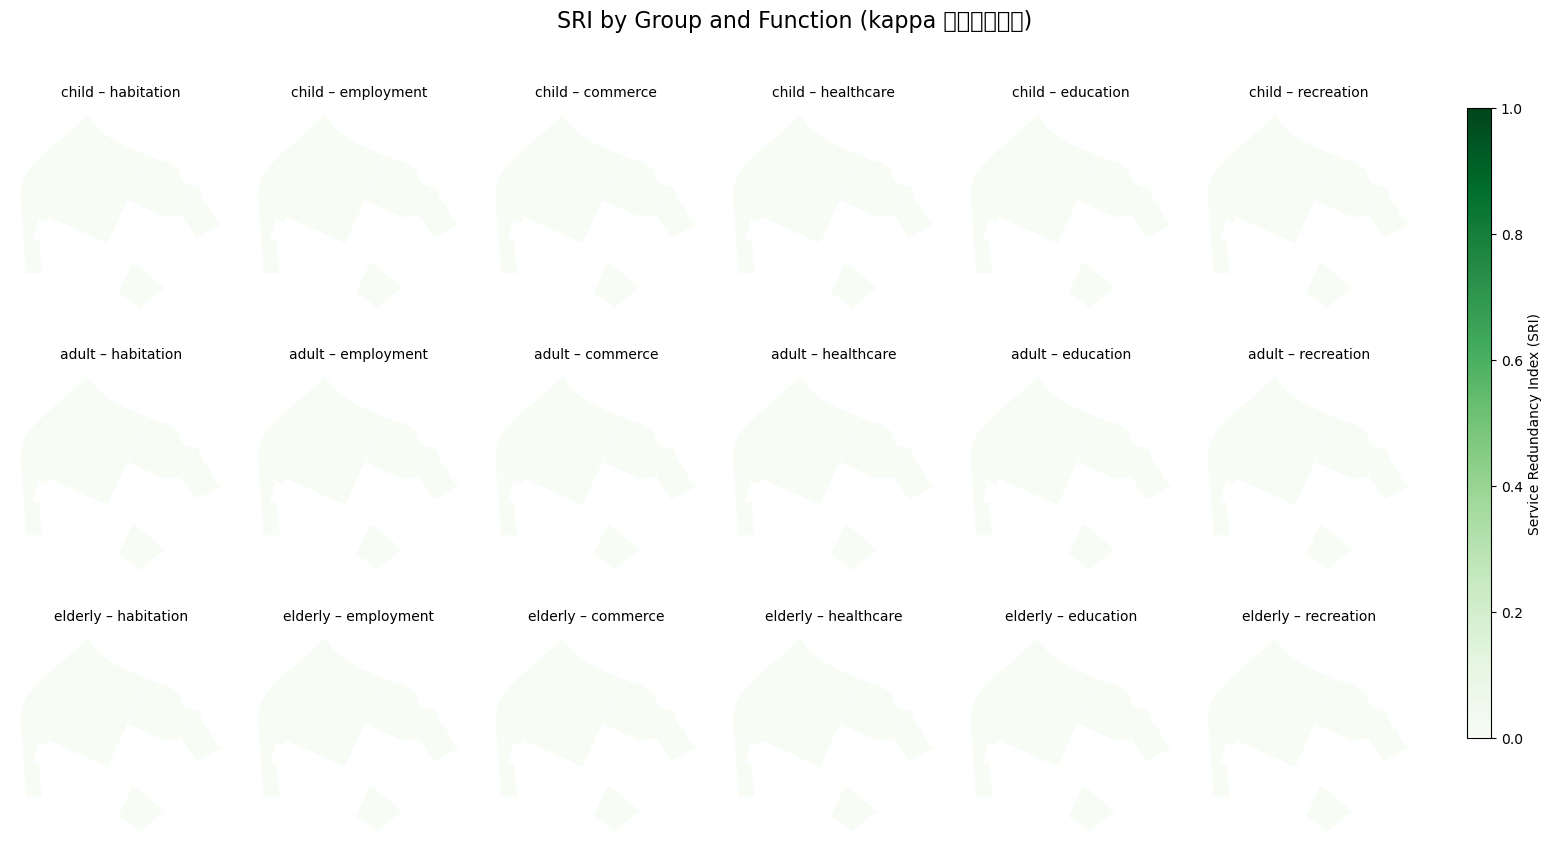

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# prepare df_sjfg, gdf_comm, population …
# df_sjfg: community, group, function, S_jfg
# gdf_comm: community, geometry, estimated_children, estimated_adults, estimated_elderly60

# Calculate SRI for each group & function
kappa_dict = {
    "habitation": 100, 
    "employment": 50, 
    "commerce": 80, 
    "healthcare": 200, 
    "education": 150, 
    "recreation": 120
}
pop_cols = { "child":"estimated_children",
             "adult":"estimated_adults",
             "elderly":"estimated_elderly60" }

# Save the result in the dictionary
group_gdfs = {}
for group, pop_col in pop_cols.items():
    # Extract the reachability of the group
    df_g = df_sjfg[df_sjfg["group"]==group]
    pivot = df_g.pivot(index="committee", columns="function", values="S_jfg").reset_index()
    # Consolidation of population and borders
    gdf = gdf_comm.merge(pivot, on="committee")
    # Calculate SRI
    for func, k in kappa_dict.items():
        Ci = gdf[func].fillna(0)
        Pi = gdf[pop_col]
        gdf[f"SRI_{func}"] = ((Ci * k - Pi)/Pi).clip(lower=0)
    group_gdfs[group] = gdf

# Drawing a 3 x 6 matrix: rows = groups, columns = functions
functions = list(kappa_dict.keys())
groups = list(pop_cols.keys())
vmin, vmax = 0, 1.0  

fig, axes = plt.subplots(
    nrows=len(groups), ncols=len(functions),
    figsize=(16, 9), sharex=False, sharey=False
)

for i, group in enumerate(groups):
    gdf = group_gdfs[group].to_crs(epsg=3857)
    for j, func in enumerate(functions):
        ax = axes[i,j]
        col = f"SRI_{func}"
        gdf.plot(
            column=col, ax=ax, cmap="Greens",
            vmin=vmin, vmax=vmax,
            edgecolor="white", linewidth=0.5,
            legend=False
        )
        ax.set_title(f"{group} – {func}", fontsize=10)
        ax.axis("off")
# Add line labels on the left side
for ax, group in zip(axes[:,0], groups):
    ax.set_ylabel(group, rotation=0, labelpad=40, va="center", fontsize=12)

# Draw a uniform colourbar outside the rightmost subgraph.
sm = plt.cm.ScalarMappable(
    cmap="Greens",
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)
sm._A = []
cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(sm, cax=cax, label="Service Redundancy Index (SRI)")

plt.suptitle("SRI by Group and Function (kappa 按功能自定义)", fontsize=16, y=0.96) # (kappa Customisation by function)
plt.tight_layout(rect=[0,0,0.9,0.95])
plt.show()